## Import package

In [36]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [2]:
preprocess_path = '../data/mimiciii/preprocess_data/'

## Load Data

In [9]:
datas = list()
paths = sorted(os.listdir(preprocess_path))
for path in tqdm(paths):
    datas.append(pd.read_csv(preprocess_path + path))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:46<00:00,  1.65s/it]


# Look Data characteristics

In [12]:
i = paths.index('ADMISSIONS.csv')
ADMISSIONS = datas[i].copy()
ADMISSIONS.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,40,38,185910,2166-08-10 00:28:00,2166-09-04 11:30:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,LONG TERM CARE HOSPITAL,Medicare,NaN,CATHOLIC,WIDOWED,WHITE,NaN,NaN,ACUTE MYOCARDIAL INFARCTION-SEPSIS,0,1
1,457,357,145674,2198-08-02 04:49:00,2198-10-26 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2198-08-02 02:03:00,2198-08-02 05:37:00,SEIZURE,0,1
2,458,357,122609,2198-11-01 22:36:00,2198-11-14 14:20:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2198-11-01 18:01:00,2198-11-01 23:06:00,SEPSIS,0,1
3,471,366,134462,2164-11-18 20:27:00,2164-11-22 15:18:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,SINGLE,HISPANIC OR LATINO,2164-11-18 10:52:00,2164-11-18 21:31:00,SEPSIS,0,1
4,61,61,189535,2119-01-04 18:12:00,2119-02-03 01:35:00,2119-02-03 01:35:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Private,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,NON-HODGKINS LYMPHOMA;FEBRILE;NEUTROPENIA,1,1


In [16]:
i = paths.index('D_ICD_PROCEDURES.csv')
D_ICD_PROCEDURES = datas[i].copy()
D_ICD_PROCEDURES

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,137,1,Ther ult head & neck ves,Therapeutic ultrasound of vessels of head and ...
1,138,2,Ther ultrasound of heart,Therapeutic ultrasound of heart
2,139,3,Ther ult peripheral ves,Therapeutic ultrasound of peripheral vascular ...
3,140,9,Other therapeutic ultsnd,Other therapeutic ultrasound
4,141,10,Implant chemothera agent,Implantation of chemotherapeutic agent
...,...,...,...,...
3877,3466,9995,Stretching of foreskin,Stretching of foreskin
3878,3467,9996,Sperm collection,Collection of sperm for artificial insemination
3879,3468,9997,Denture fitting,Fitting of denture
3880,3469,9998,Milk extraction,Extraction of milk from lactating breast


In [17]:
i = paths.index('D_ICD_DIAGNOSES.csv')
D_ICD_DIAGNOSES = datas[i].copy()
D_ICD_DIAGNOSES

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."
...,...,...,...,...
14562,14432,V7399,Scrn unspcf viral dis,Special screening examination for unspecified ...
14563,14433,V740,Screening for cholera,Screening examination for cholera
14564,14434,V741,Screening-pulmonary TB,Screening examination for pulmonary tuberculosis
14565,14435,V742,Screening for leprosy,Screening examination for leprosy (Hansen's di...


In [18]:
i = paths.index('DIAGNOSES_ICD.csv')
datas[i].sort_values(by=['SUBJECT_ID', 'SEQ_NUM'], inplace=True)
DIAGNOSES_ICD = datas[i].copy()
DIAGNOSES_ICD

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,140,21,111970,11.0,99592
1,307,38,185910,3.0,99592
2,477,61,189535,8.0,99591
3,490,62,116009,4.0,99591
4,505,64,172056,3.0,99591
...,...,...,...,...,...
5404,650341,99836,101018,8.0,99592
5405,650470,99865,189346,4.0,99592
5406,650720,99912,189380,8.0,99592
5407,650990,99985,176670,7.0,99592


In [19]:
i = paths.index('ICUSTAYS.csv')
ICUSTAYS = datas[i].copy()
ICUSTAYS.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
1,372,275,129886,219649,carevue,CCU,CCU,7,7,2170-10-07 11:28:53,2170-10-14 14:38:07,7.1314
2,410,305,194340,217232,metavision,SICU,SICU,33,33,2129-09-03 12:31:31,2129-09-05 23:00:50,2.4370
3,432,323,143334,264375,carevue,MICU,MICU,23,23,2120-01-11 15:48:28,2120-01-14 16:24:43,3.0252
4,439,329,172132,217001,carevue,MICU,MICU,50,50,2154-04-05 16:36:51,2154-04-08 18:14:48,3.0680


In [20]:
i = paths.index('PATIENTS.csv')
PATIENTS = datas[i].copy()
PATIENTS.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
1,252,269,M,2130-09-30 00:00:00,NaN,NaN,NaN,0
2,646,685,F,2126-07-29 00:00:00,NaN,NaN,NaN,0
3,650,689,F,2128-12-27 00:00:00,NaN,NaN,NaN,0
4,651,690,M,2109-09-24 00:00:00,2189-07-30 00:00:00,2189-07-30 00:00:00,2189-07-30 00:00:00,1


In [21]:
i = paths.index('INPUTEVENTS_CV.csv')
INPUTEVENTS_CV = datas[i].copy()
INPUTEVENTS_CV.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,RATEUOM,...,ORDERID,LINKORDERID,STOPPED,NEWBOTTLE,ORIGINALAMOUNT,ORIGINALAMOUNTUOM,ORIGINALROUTE,ORIGINALRATE,ORIGINALRATEUOM,ORIGINALSITE
0,7534,13168,182334.0,266561.0,2185-10-20 10:00:00,30056,120.0,ml,NaN,NaN,...,9164547,9164547,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
1,7535,13168,182334.0,266561.0,2185-10-20 12:00:00,30056,150.0,ml,NaN,NaN,...,3692841,9164547,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
2,7536,13168,182334.0,266561.0,2185-10-20 16:00:00,30056,100.0,ml,NaN,NaN,...,10641024,9164547,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
3,7537,13168,182334.0,266561.0,2185-10-20 21:00:00,30056,100.0,ml,NaN,NaN,...,11331457,9164547,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
4,7538,13168,182334.0,266561.0,2185-10-20 23:00:00,30056,60.0,ml,NaN,NaN,...,10791487,9164547,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN


In [22]:
INPUTEVENTS_CV['AMOUNTUOM'].unique()

array(['ml', nan, 'mg', 'U', 'cal', 'tsp', 'mcg', 'mEQ', 'mEq', 'cc',
       'gm', 'str'], dtype=object)

In [23]:
i = paths.index('INPUTEVENTS_CV.csv')
INPUTEVENTS_MV = datas[i].copy()
INPUTEVENTS_MV.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,RATEUOM,...,ORDERID,LINKORDERID,STOPPED,NEWBOTTLE,ORIGINALAMOUNT,ORIGINALAMOUNTUOM,ORIGINALROUTE,ORIGINALRATE,ORIGINALRATEUOM,ORIGINALSITE
0,7534,13168,182334.0,266561.0,2185-10-20 10:00:00,30056,120.0,ml,NaN,NaN,...,9164547,9164547,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
1,7535,13168,182334.0,266561.0,2185-10-20 12:00:00,30056,150.0,ml,NaN,NaN,...,3692841,9164547,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
2,7536,13168,182334.0,266561.0,2185-10-20 16:00:00,30056,100.0,ml,NaN,NaN,...,10641024,9164547,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
3,7537,13168,182334.0,266561.0,2185-10-20 21:00:00,30056,100.0,ml,NaN,NaN,...,11331457,9164547,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
4,7538,13168,182334.0,266561.0,2185-10-20 23:00:00,30056,60.0,ml,NaN,NaN,...,10791487,9164547,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN


In [24]:
INPUTEVENTS_MV['AMOUNTUOM'].unique()

array(['ml', nan, 'mg', 'U', 'cal', 'tsp', 'mcg', 'mEQ', 'mEq', 'cc',
       'gm', 'str'], dtype=object)

In [25]:
i = paths.index('OUTPUTEVENTS.csv')
OUTPUTEVENTS = datas[i].copy()
OUTPUTEVENTS.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM,STORETIME,CGID,STOPPED,NEWBOTTLE,ISERROR
0,70086,13168,182334.0,266561.0,2185-10-23 06:30:00,40055,40.0,ml,2185-10-23 06:45:00,14442,NaN,NaN,NaN
1,70087,13168,182334.0,266561.0,2185-10-23 08:00:00,40055,60.0,ml,2185-10-23 08:12:00,21570,NaN,NaN,NaN
2,70088,13168,182334.0,266561.0,2185-10-23 09:00:00,40055,18.0,ml,2185-10-23 09:38:00,21570,NaN,NaN,NaN
3,70089,13168,182334.0,266561.0,2185-10-23 11:00:00,40055,150.0,ml,2185-10-23 11:12:00,21570,NaN,NaN,NaN
4,70090,13168,182334.0,266561.0,2185-10-23 15:00:00,40055,180.0,ml,2185-10-23 15:07:00,21570,NaN,NaN,NaN


In [26]:
OUTPUTEVENTS['VALUEUOM'].unique()

array(['ml', nan, 'mL'], dtype=object)

In [27]:
i = paths.index('D_ITEMS.csv')
D_ITEMS = datas[i].copy()
D_ITEMS.head()

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
0,27,1,% Inspir. Time,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
1,28,2,ABI (L),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
2,29,3,ABI (R),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
3,30,4,ABI Ankle BP [Right],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
4,31,5,ABI Brachial BP [Right],NaN,carevue,chartevents,NaN,NaN,NaN,NaN


In [28]:
i = paths.index('D_LABITEMS.csv')
D_LABITEMS = datas[i].copy()
D_LABITEMS.head()

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,1,50800,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN
1,2,50801,Alveolar-arterial Gradient,Blood,Blood Gas,19991-9
2,3,50802,Base Excess,Blood,Blood Gas,11555-0
3,4,50803,"Calculated Bicarbonate, Whole Blood",Blood,Blood Gas,1959-6
4,5,50804,Calculated Total CO2,Blood,Blood Gas,34728-6


In [29]:
i = paths.index('DRGCODES.csv')
DRGCODES = datas[i].copy()
DRGCODES.head()

,ROW_ID,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DESCRIPTION,DRG_SEVERITY,DRG_MORTALITY
0,2861,9102,154215,HCFA,385,"NEONATES, DIED OR TRANSFERRED TO ANOTHER ACUTE...",NaN,NaN
1,2933,20617,178293,HCFA,386,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,NaN,NaN
2,3019,14831,160882,HCFA,386,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,NaN,NaN
3,3027,15204,168396,HCFA,386,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,NaN,NaN
4,4357,5424,157250,HCFA,386,EXTREME IMMATURITY OR RESPIRATORY DISTRESS SYN...,NaN,NaN


In [30]:
i = paths.index('LABEVENTS.csv')
LABEVENTS = datas[i].copy()
LABEVENTS.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,10440,21,111970.0,51279,2135-02-03 05:04:00,2.81,2.81,m/uL,abnormal
1,10441,21,111970.0,51301,2135-02-03 05:04:00,26.8,26.80,K/uL,abnormal
2,10442,21,111970.0,50800,2135-02-03 05:13:00,MIX,NaN,NaN,NaN
3,10443,21,111970.0,50813,2135-02-03 05:13:00,2.6,2.60,mmol/L,abnormal
4,10444,21,111970.0,50817,2135-02-03 05:13:00,56,56.00,%,NaN


In [31]:
i = paths.index('PRESCRIPTIONS.csv')
PRESCRIPTIONS = datas[i].copy()
PRESCRIPTIONS.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,1390475,21,111970,216859.0,2135-01-31 00:00:00,2135-01-31 00:00:00,BASE,NS (Mini Bag Plus),NaN,NaN,NS/MBP100I,001210,338055318.0,100mL Bag,100,ml,1,BAG,IV
1,1389751,21,111970,216859.0,2135-01-31 00:00:00,2135-01-31 00:00:00,MAIN,Levothyroxine Sodium,Levothyroxine Sodium,Levothyroxine Sodium,LEVO50,006649,74455211.0,50mcg Tablet,50,mcg,1,TAB,PO
2,1379358,21,111970,216859.0,2135-01-31 00:00:00,2135-01-31 00:00:00,MAIN,Meropenem,NaN,NaN,MERO500I,026488,310032520.0,500mg Vial,500,mg,1,VIAL,IV
3,1390474,21,111970,216859.0,2135-01-31 00:00:00,2135-02-01 00:00:00,BASE,SW,NaN,NaN,KCLBASE2,NaN,0.0,50ml Bag,100,ml,100,ml,IV
4,1390472,21,111970,216859.0,2135-01-31 00:00:00,2135-02-01 00:00:00,BASE,Iso-Osmotic Dextrose,NaN,NaN,VANCOBASE,NaN,0.0,200ml Bag,200,ml,200,ml,IV


In [32]:
i = paths.index('PROCEDUREEVENTS_MV.csv')
PROCEDUREEVENTS_MV = datas[i].copy()
PROCEDUREEVENTS_MV

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,VALUE,VALUEUOM,LOCATION,...,ORDERCATEGORYNAME,SECONDARYORDERCATEGORYNAME,ORDERCATEGORYDESCRIPTION,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE
0,379,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225401,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
1,380,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225454,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
2,381,29070,115071,232563.0,2145-03-12 23:05:00,2145-03-18 20:01:00,225792,8456.0,hour,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
3,382,29070,115071,232563.0,2145-03-12 23:36:00,2145-03-12 23:37:00,225402,1.0,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
4,383,29070,115071,232563.0,2145-03-13 01:27:00,2145-03-16 16:00:00,224560,5193.0,min,Right IJ,...,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54246,256769,48453,145436,282267.0,2200-10-21 20:38:00,2200-10-21 20:39:00,225459,1.0,None,NaN,...,Imaging,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
54247,256770,48453,145436,282267.0,2200-10-21 21:00:00,2200-10-21 21:01:00,227194,1.0,None,NaN,...,Intubation/Extubation,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
54248,257767,58723,147134,276930.0,2192-09-05 21:30:00,2192-09-07 23:46:00,224277,3016.0,min,NaN,...,Peripheral Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
54249,257768,58723,147134,276930.0,2192-09-05 21:30:00,2192-09-07 23:46:00,224277,3016.0,min,NaN,...,Peripheral Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN


In [33]:
i = paths.index('PROCEDURES_ICD.csv')
PROCEDURES_ICD = datas[i].copy()
PROCEDURES_ICD

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,11860,5424,157250,1,9672
1,11861,5424,157250,2,5301
2,11862,5424,157250,3,1424
3,11863,5424,157250,4,9604
4,11864,5424,157250,5,9983
...,...,...,...,...,...
32554,228330,67415,150871,5,3736
32555,228331,67415,150871,6,3893
32556,228332,67415,150871,7,8872
32557,228333,67415,150871,8,3893


In [34]:
i = paths.index('CHARTEVENTS1.csv')
CHARTEVENTS1 = datas[i].copy()
CHARTEVENTS2 = datas[i + 1].copy()
CHARTEVENTS3 = datas[i + 2].copy()
CHARTEVENTS4 = datas[i + 3].copy()
CHARTEVENTS5 = datas[i + 4].copy()
CHARTEVENTS6 = datas[i + 5].copy()
CHARTEVENTS7 = datas[i + 6].copy()
CHARTEVENTS8 = datas[i + 7].copy()
CHARTEVENTS9 = datas[i + 8].copy()
CHARTEVENTS1.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,2190,85,112077,291697.0,223751,2167-07-26 16:58:00,2167-07-26 18:59:00,20214.0,160.0,160.0,mmHg,0.0,0.0,NaN,NaN
1,2191,85,112077,291697.0,223752,2167-07-26 16:58:00,2167-07-26 18:59:00,20214.0,90.0,90.0,mmHg,0.0,0.0,NaN,NaN
2,2192,85,112077,291697.0,223769,2167-07-26 16:58:00,2167-07-26 18:59:00,20214.0,100.0,100.0,%,0.0,0.0,NaN,NaN
3,2193,85,112077,291697.0,223770,2167-07-26 16:58:00,2167-07-26 18:59:00,20214.0,92.0,92.0,%,0.0,0.0,NaN,NaN
4,2194,85,112077,291697.0,224161,2167-07-26 16:58:00,2167-07-26 18:59:00,20214.0,35.0,35.0,insp/min,0.0,0.0,NaN,NaN


# Features

In [25]:
# last row don't understand meaning
features = ['Shock_Index', 'elixhauser', 'SIRS', 'gender', 're_admission', 'GCS', 'SOFA', 'age', 'Albumin',
           'Arterial_pH', 'Calcium', 'Glucose', 'Hemoglobin', 'Magnesium', 'PTT', 'Potassium', 'SGPT', 
           'Arterial_blood_gas', 'BUN', 'HCO3', 'INR', 'Arterial_lactate', 'CO2', 'Creatinine', 
           'Ionised_Ca', 'PT', 'Platelets_count', 'SGOT', 'Total_bili', 'WBC_count', 'DiaBP', 'SysBP', 
           'MeanBP', 'PaCO2', 'PaO2', 'FiO2', 'PaO_FiO2_ratio', 'RR', 'Temp_C', 'Weight_kg', 'HR', 'SpO2'
           'input_total_tev', 'input_4hourly_tev', 'output_total', 'output_4hourly', 'bloc', 'mechvent']

binary_features = ['gender', 're_admission', 'mechvent']
norm_features = ['Shock_Index', 'elixhauser', 'SIRS', 'GCS', 'SOFA', 'age', 'Albumin', 'Arterial_pH', 
                'Calcium', 'Glucose', 'Hemoglobin', 'Magnesium', 'PTT', 'Potassium', 'Arterial_blood_gas', 
                'HCO3', 'Arterial_lactate', 'CO2', 'Ionised_Ca', 'PT', 'Platelets_count', 'WBC_count', 
                'DiaBP', 'SysBP', 'MeanBP', 'PaCO2', 'PaO2', 'FiO2', 'PaO_FiO2_ratio', 'RR', 'Temp_C', 
                'Weight_kg', 'HR', ]
log_features = ['SGPT', 'BUN', 'INR', 'Creatinine', 'SGOT', 'Total_bili', 'SpO2', 'input_total_tev',
                'input_4hourly_tev', 'output_total', 'output_4hourly', 'bloc']

In [26]:
feature = pd.DataFrame(columns = ['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE'])
lab_feature = pd.DataFrame(columns = ['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE'])

In [27]:
D_ITEMS.drop(D_ITEMS[D_ITEMS.isnull()['LABEL']].index, inplace=True)

## GCS - Glasgow Coma Scale (ITEMID: 198)

In [102]:
d = D_ITEMS[['gcs' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['GCS'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[d['ITEMID'] == 198].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'GCS']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
0,GCS,198,GCS Total,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
1,GCS,220739,GCS - Eye Opening,Eye Opening,metavision,chartevents,Neurological,NaN,Text,NaN,False
2,GCS,223900,GCS - Verbal Response,Verbal Response,metavision,chartevents,Neurological,NaN,Text,NaN,False
3,GCS,223901,GCS - Motor Response,Motor Response,metavision,chartevents,Neurological,NaN,Text,NaN,False
4,GCS,226755,GcsApacheIIScore,GcsApacheIIScore,metavision,chartevents,Scores - APACHE II,None,Numeric,NaN,False
5,GCS,226756,GCSEyeApacheIIValue,GCSEyeApacheIIValue,metavision,chartevents,Scores - APACHE II,NaN,Text,NaN,False
6,GCS,226757,GCSMotorApacheIIValue,GCSMotorApacheIIValue,metavision,chartevents,Scores - APACHE II,NaN,Text,NaN,False
7,GCS,226758,GCSVerbalApacheIIValue,GCSVerbalApacheIIValue,metavision,chartevents,Scores - APACHE II,NaN,Text,NaN,False
8,GCS,227011,GCSEye_ApacheIV,GCSEye_ApacheIV,metavision,chartevents,Scores - APACHE IV (2),NaN,Text,NaN,False
9,GCS,227012,GCSMotor_ApacheIV,GCSMotor_ApacheIV,metavision,chartevents,Scores - APACHE IV (2),NaN,Text,NaN,False


In [28]:
D_ITEMS[D_ITEMS['ITEMID'] == 198]

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
172,462,199,198,GCS Total,NaN,carevue,chartevents,NaN,NaN,NaN,NaN


In [29]:
CHARTEVENTS1[CHARTEVENTS1['ITEMID'] == 198]

,Unnamed: 0,Unnamed: 0.1,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
10159427,34030223,34030223,34352170,21,111970,216859.0,198,2135-02-05 20:00:00,2135-02-05 19:50:00,20706.0,13,13.0,points,NaN,NaN,NaN,NotStopd
10159501,34030297,34030297,34353269,21,111970,216859.0,198,2135-02-07 08:00:00,2135-02-07 08:50:00,18576.0,9,9.0,points,NaN,NaN,NaN,NotStopd
10159624,34031024,34031024,34349116,21,111970,216859.0,198,2135-02-02 04:00:00,2135-02-02 04:26:00,14206.0,14,14.0,points,NaN,NaN,NaN,NotStopd
10159685,34031085,34031085,34350191,21,111970,216859.0,198,2135-02-03 12:00:00,2135-02-03 12:22:00,19150.0,15,15.0,points,NaN,NaN,NaN,NotStopd
10161003,34034697,34034697,34351703,21,111970,216859.0,198,2135-02-05 08:00:00,2135-02-05 09:26:00,17480.0,14,14.0,points,NaN,NaN,NaN,NotStopd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11349567,39978768,39978768,39954448,1026,103873,215365.0,198,2196-04-04 11:00:00,2196-04-04 11:14:00,15654.0,13,13.0,points,NaN,NaN,NaN,NotStopd
11349627,39982470,39982470,39952768,1026,103873,215365.0,198,2196-04-02 06:00:00,2196-04-02 06:51:00,18654.0,11,11.0,points,NaN,NaN,NaN,NotStopd
11349733,39988631,39988631,39953892,1026,103873,215365.0,198,2196-04-03 19:00:00,2196-04-03 19:19:00,18654.0,11,11.0,points,NaN,NaN,NaN,NotStopd
11349805,39989719,39989719,39953084,1026,103873,215365.0,198,2196-04-02 12:00:00,2196-04-02 12:21:00,21205.0,10,10.0,points,NaN,NaN,NaN,NotStopd


## SOFA (ITEMID: 227428)

In [103]:
d = D_ITEMS[['sofa' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['SOFA'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[d['ITEMID'] == 227428].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'SOFA']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
13,SOFA,227428,SOFA Score,SOFA Score,metavision,chartevents,General,None,Numeric,NaN,True


In [30]:
CHARTEVENTS1[CHARTEVENTS1['ITEMID'] == 227428]

,Unnamed: 0,Unnamed: 0.1,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
1903847,5124339,5124339,5090721,32436,184018,293184.0,227428,2129-03-08 16:48:00,2129-03-08 16:48:00,15511.0,11.0,11.0,NaN,0.0,0.0,NaN,NaN


## Albumin (ITEMID: 50862, 772, 1521, 227456)

In [104]:
d = D_ITEMS[['albumin' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Albumin'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [50862, 772, 1521, 227456] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Albumin']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
14,Albumin,772,Albumin (>3.2),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
15,Albumin,1521,Albumin,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
16,Albumin,2358,ALBUMIN,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
17,Albumin,3066,albumin,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
18,Albumin,3727,Albumin (3.9-4.8),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,False
19,Albumin,30008,Albumin 5%,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False
20,Albumin,30009,Albumin 25%,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False
21,Albumin,30181,Serum Albumin 5%,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False
22,Albumin,40548,ALBUMIN,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False
23,Albumin,42832,albumin 12.5%,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False


In [105]:
d = D_LABITEMS[['albumin' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Albumin'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [50862, 772, 1521, 227456] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'Albumin']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
0,Albumin,50835,"Albumin, Ascites",Ascites,Chemistry,1749-1,False
1,Albumin,50862,Albumin,Blood,Chemistry,1751-7,True
2,Albumin,51011,<Albumin>,Cerebrospinal Fluid (CSF),Chemistry,1746-7,False
3,Albumin,51019,"Albumin, Joint Fluid",Joint Fluid,Chemistry,NaN,False
4,Albumin,51025,"Albumin, Body Fluid",Other Body Fluid,Chemistry,1747-5,False
5,Albumin,51046,"Albumin, Pleural",Pleural,Chemistry,1748-3,False
6,Albumin,51069,"Albumin, Urine",Urine,Chemistry,1754-1,False
7,Albumin,51070,"Albumin/Creatinine, Urine",Urine,Chemistry,14958-3,False
8,Albumin,51555,SURFACTANT ALBUMIN RATIO,OTHER BODY FLUID,CHEMISTRY,NaN,False


In [32]:
D_ITEMS.query('ITEMID == 772 | ITEMID == 1521 | ITEMID == 227456')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
665,1511,692,772,Albumin (>3.2),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
1110,2789,2973,1521,Albumin,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
11609,10087,14770,227456,Albumin,Albumin,metavision,chartevents,Labs,None,Numeric with tag,NaN


In [72]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 227456")['VALUEUOM'].unique())
set(unit)

{'g/dL', nan}

In [73]:
LABEVENTS.query("ITEMID == 50862")

,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
16,10101,10456,21,111970.0,50862,2135-02-04 04:08:00,1.7,1.7,g/dL,abnormal
174,10553,10247,21,111970.0,50862,2135-01-31 05:20:00,2.1,2.1,g/dL,abnormal
450,16020,16521,38,185910.0,50862,2166-08-10 00:17:00,2.7,2.7,g/dL,abnormal
716,17066,16747,38,185910.0,50862,2166-08-12 01:24:00,2.2,2.2,g/dL,abnormal
881,17548,16918,38,185910.0,50862,2166-08-15 02:20:00,1.5,1.5,g/dL,abnormal
...,...,...,...,...,...,...,...,...,...,...
4182814,27852240,27741086,98864,141667.0,50862,2167-11-03 23:00:00,3.9,3.9,g/dL,NaN
4182855,27852405,27779479,99096,190010.0,50862,2110-06-30 14:25:00,3.7,3.7,g/dL,NaN
4182957,27852923,27771381,99052,129142.0,50862,2141-03-22 01:04:00,3.7,3.7,g/dL,NaN
4183194,27853887,27764174,98994,178949.0,50862,2137-09-25 04:29:00,3.9,3.9,g/dL,NaN


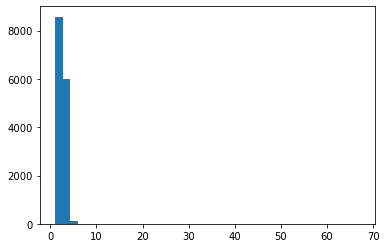

In [43]:
id = 50931
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

## Arterial_pH (ITEMID: 780, 1126, 223830, 50820)

In [106]:
d = D_ITEMS[['art' in str(s).lower() and 'ph' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Arterial_pH'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [780, 1126, 223830, 50820] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Arterial_pH']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
38,Arterial_pH,780,Arterial pH,NaN,carevue,chartevents,ABG,NaN,NaN,NaN,True
39,Arterial_pH,1126,Art.pH,NaN,carevue,chartevents,ABG,NaN,NaN,NaN,True
40,Arterial_pH,4753,pH (Art),NaN,carevue,chartevents,ABG,NaN,NaN,NaN,False
41,Arterial_pH,223830,PH (Arterial),PH (Arterial),metavision,chartevents,Labs,None,Numeric,NaN,True
42,Arterial_pH,225076,Emotional / physical / sexual harm by partner ...,Emotional / physical / sexual harm,metavision,chartevents,Adm History/FHPA,NaN,Checkbox,NaN,False
43,Arterial_pH,228194,Peripheral Pulses (Tandem Heart),Peripheral Pulses (Tandem Heart),metavision,chartevents,Tandem Heart,NaN,Text,NaN,False


In [107]:
d = D_LABITEMS[['ph' == str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Arterial_pH'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [50862, 772, 1521, 227456] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'Arterial_pH']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
9,Arterial_pH,50820,pH,Blood,Blood Gas,11558-4,False
10,Arterial_pH,50831,pH,Other Body Fluid,Blood Gas,2748-2,False
11,Arterial_pH,51094,pH,Urine,Chemistry,2756-5,False
12,Arterial_pH,51491,pH,Urine,Hematology,5803-2,False


In [44]:
D_ITEMS.query('ITEMID == 780 | ITEMID == 1126 | ITEMID == 223830')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
673,1519,700,780,Arterial pH,NaN,carevue,chartevents,ABG,NaN,NaN,NaN
870,119,1271,1126,Art.pH,NaN,carevue,chartevents,ABG,NaN,NaN,NaN
9765,12411,12802,223830,PH (Arterial),PH (Arterial),metavision,chartevents,Labs,None,Numeric,NaN


In [76]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 223830")['VALUEUOM'].unique())
set(unit)

{nan, 'units'}

In [77]:
LABEVENTS.query("ITEMID == 50820")['VALUEUOM'].unique()

array(['units'], dtype=object)

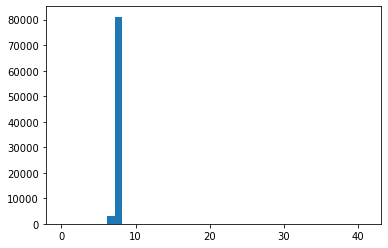

count    84394.000000
mean         7.365712
std          0.202515
min          0.000000
25%          7.310000
50%          7.380000
75%          7.430000
max         41.000000
Name: VALUENUM, dtype: float64


In [55]:
id = 50931
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

## Calcium (ITEMID: 225625, 50893, 786, 1522)

In [108]:
d = D_ITEMS[['calcium' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Calcium'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [225625, 50893, 786, 1522] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Calcium']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
44,Calcium,786,Calcium (8.4-10.2),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
45,Calcium,816,Ionized Calcium,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,False
46,Calcium,1350,ionized calcium,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
47,Calcium,1522,Calcium,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
48,Calcium,1663,Calcium gluconate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
49,Calcium,2185,CALCIUM GLUCONATE,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
50,Calcium,3219,calcium gluconate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
51,Calcium,3347,Calcium Gluconate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
52,Calcium,3746,Calcium (8.8-10.8),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,False
53,Calcium,3766,Ion Calcium,NaN,carevue,chartevents,ABG's,NaN,NaN,NaN,False


In [109]:
d = D_LABITEMS[['calcium' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Calcium'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [225625, 50893, 786, 1522] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'Calcium']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
13,Calcium,50808,Free Calcium,Blood,Blood Gas,1994-3,False
14,Calcium,50893,"Calcium, Total",Blood,Chemistry,2000-8,True
15,Calcium,51029,"Calcium, Body Fluid",Other Body Fluid,Chemistry,15155-5,False
16,Calcium,51066,24 hr Calcium,Urine,Chemistry,6874-2,False
17,Calcium,51077,"Calcium, Urine",Urine,Chemistry,2004-0,False
18,Calcium,51468,Calcium Carbonate Crystals,Urine,Hematology,5773-7,False
19,Calcium,51469,Calcium Oxalate Crystals,Urine,Hematology,5774-5,False
20,Calcium,51470,Calcium Phosphate Crystals,Urine,Hematology,5775-2,False


In [79]:
D_ITEMS.query('ITEMID == 786 | ITEMID == 1522 | ITEMID == 225625')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
679,1525,706,786,Calcium (8.4-10.2),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
1111,2790,2974,1522,Calcium,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
10798,10506,14082,225625,Calcium non-ionized,Calcium non-ionized,metavision,chartevents,Labs,None,Numeric,NaN


In [83]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 225625")['VALUEUOM'].unique())
set(unit)

{'mg/dL', nan}

In [84]:
LABEVENTS.query("ITEMID == 50893")['VALUEUOM'].unique()

array(['mg/dL'], dtype=object)

## Glucose (ITEMID: 220621, 225664, 50809, 811, 807, 50931, 226537, 1529)

In [110]:
d = D_ITEMS[['glucose' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Glucose'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [220621, 225664, 50809, 811, 807, 50931, 226537, 1529] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Glucose']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
85,Glucose,807,Fingerstick Glucose,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
86,Glucose,811,Glucose (70-105),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
87,Glucose,1310,FINGERSTICK GLUCOSE.,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
88,Glucose,1455,fingerstick glucose,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
89,Glucose,1529,Glucose,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
90,Glucose,1812,abg: glucose,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
91,Glucose,2338,finger stick glucose,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
92,Glucose,3447,Glucose Monitor #,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
93,Glucose,3744,Blood Glucose,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,False
94,Glucose,3745,BloodGlucose,NaN,carevue,chartevents,Quick Admit,NaN,NaN,NaN,False


In [111]:
d = D_LABITEMS[['glucose' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Glucose'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [220621, 225664, 50809, 811, 807, 50931, 226537, 1529] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'Glucose']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
21,Glucose,50809,Glucose,Blood,Blood Gas,2339-0,True
22,Glucose,50842,"Glucose, Ascites",Ascites,Chemistry,2347-3,False
23,Glucose,50931,Glucose,Blood,Chemistry,2345-7,True
24,Glucose,51014,"Glucose, CSF",Cerebrospinal Fluid (CSF),Chemistry,2342-4,False
25,Glucose,51022,"Glucose, Joint Fluid",Joint Fluid,Chemistry,2348-1,False
26,Glucose,51034,"Glucose, Body Fluid",Other Body Fluid,Chemistry,2344-0,False
27,Glucose,51053,"Glucose, Pleural",Pleural,Chemistry,2346-5,False
28,Glucose,51084,"Glucose, Urine",Urine,Chemistry,2350-7,False
29,Glucose,51478,Glucose,Urine,Hematology,5792-7,False
30,Glucose,51529,Estimated Actual Glucose,BLOOD,CHEMISTRY,NaN,False


In [86]:
D_ITEMS.query('ITEMID == 807 | ITEMID == 811 | ITEMID == 1529 | ITEMID == 220621 | ITEMID == 225664 | ITEMID == 226537')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
699,1545,726,807,Fingerstick Glucose,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
703,1549,730,811,Glucose (70-105),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
1118,2797,2981,1529,Glucose,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
9551,11485,12699,220621,Glucose (serum),Glucose (serum),metavision,chartevents,Labs,None,Numeric,NaN
10827,10535,14111,225664,Glucose finger stick,Glucose finger stick,metavision,chartevents,Labs,None,Numeric,NaN
11264,11890,14406,226537,Glucose (whole blood),Glucose (whole blood),metavision,chartevents,Labs,None,Numeric,NaN


In [92]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 226537")['VALUEUOM'].unique())
set(unit)

{'mg/dL', nan}

In [94]:
LABEVENTS.query("ITEMID == 50931")['VALUEUOM'].unique()

array(['mg/dL'], dtype=object)

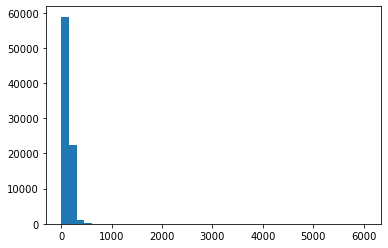

count    82726.000000
mean       138.870198
std         70.558433
min          0.000000
25%        104.000000
50%        126.000000
75%        158.000000
max       6041.000000
Name: VALUENUM, dtype: float64


In [64]:
id = 220621
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

## Hemoglobin (ITEMID: 220228, 51222, 50811, 814)

In [112]:
d = D_ITEMS[['hemoglobin' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Hemoglobin'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [220228, 51222, 50811, 814] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Hemoglobin']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
106,Hemoglobin,814,Hemoglobin,NaN,carevue,chartevents,Hematology,NaN,NaN,NaN,True
107,Hemoglobin,7965,methhemoglobin,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
108,Hemoglobin,220228,Hemoglobin,Hemoglobin,metavision,chartevents,Labs,g/dl,Numeric,NaN,True


In [113]:
d = D_LABITEMS[['hemoglobin' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Hemoglobin'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [220228, 51222, 50811, 814] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'Hemoglobin']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
31,Hemoglobin,50805,Carboxyhemoglobin,Blood,Blood Gas,20563-3,False
32,Hemoglobin,50811,Hemoglobin,Blood,Blood Gas,718-7,True
33,Hemoglobin,50814,Methemoglobin,Blood,Blood Gas,2614-6,False
34,Hemoglobin,50852,% Hemoglobin A1c,Blood,Chemistry,4548-4,False
35,Hemoglobin,50855,Absolute Hemoglobin,Blood,Chemistry,718-7,False
36,Hemoglobin,51212,Fetal Hemoglobin,Blood,Hematology,4576-5,False
37,Hemoglobin,51222,Hemoglobin,Blood,Hematology,718-7,True
38,Hemoglobin,51223,Hemoglobin A2,Blood,Hematology,4552-6,False
39,Hemoglobin,51224,Hemoglobin C,Blood,Hematology,4561-7,False
40,Hemoglobin,51225,Hemoglobin F,Blood,Hematology,9749-3,False


In [95]:
D_ITEMS.query('ITEMID == 814 | ITEMID == 220228')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
706,1552,733,814,Hemoglobin,NaN,carevue,chartevents,Hematology,NaN,NaN,NaN
9526,11528,12742,220228,Hemoglobin,Hemoglobin,metavision,chartevents,Labs,g/dl,Numeric,NaN


In [98]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 220228")['VALUEUOM'].unique())
set(unit)

{'g/dl'}

In [100]:
LABEVENTS.query("ITEMID == 51222")['VALUEUOM'].unique()

array(['g/dL'], dtype=object)

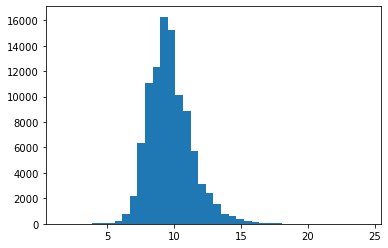

count    98793.000000
mean         9.724544
std          1.626356
min          1.600000
25%          8.600000
50%          9.500000
75%         10.600000
max         24.300000
Name: VALUENUM, dtype: float64


In [68]:
id = 51222
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

## Magnesium (ITEMID: 220635, 50960, 1532, 821)

In [114]:
d = D_ITEMS[['magnesium' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Magnesium'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [220635, 50960, 1532, 821] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Magnesium']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
109,Magnesium,821,Magnesium (1.6-2.6),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
110,Magnesium,1532,Magnesium,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
111,Magnesium,1970,magnesium 2gm/hr,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
112,Magnesium,6133,Magnesium Sulfate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
113,Magnesium,30027,Magnesium Sulfate,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False
114,Magnesium,40645,magnesium,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False
115,Magnesium,43018,magnesium 1gm/hr,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False
116,Magnesium,44088,Magnesium,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False
117,Magnesium,220635,Magnesium,Magnesium,metavision,chartevents,Labs,None,Numeric,NaN,True
118,Magnesium,222011,Magnesium Sulfate,Magnesium Sulfate,metavision,inputevents_mv,Medications,grams,Solution,NaN,False


In [115]:
d = D_LABITEMS[['magnesium' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Magnesium'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [220635, 50960, 1532, 821] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'Magnesium']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
42,Magnesium,50960,Magnesium,Blood,Chemistry,2601-3,True
43,Magnesium,51037,"Magnesium, Body Fluid",Other Body Fluid,Chemistry,29365-4,False
44,Magnesium,51088,"Magnesium, Urine",Urine,Chemistry,2598-1,False


In [101]:
D_ITEMS.query('ITEMID == 821 | ITEMID == 1532 | ITEMID == 220635')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
713,1559,740,821,Magnesium (1.6-2.6),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
1121,2800,2984,1532,Magnesium,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
9554,11488,12702,220635,Magnesium,Magnesium,metavision,chartevents,Labs,None,Numeric,NaN


In [104]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 220635")['VALUEUOM'].unique())
set(unit)

{'mg/dL', nan}

In [105]:
LABEVENTS.query("ITEMID == 50960")['VALUEUOM'].unique()

array(['mg/dL'], dtype=object)

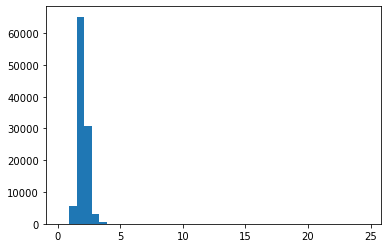

count    105139.000000
mean          2.048296
std           0.381449
min           0.300000
25%           1.800000
50%           2.000000
75%           2.200000
max          24.600000
Name: VALUENUM, dtype: float64


In [72]:
id = 50960
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

## PTT-Partial Thromboplastin Time (ITEMID: 227466, 825, 1533, 51275)

In [116]:
d = D_ITEMS[['ptt' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['PTT'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [227466, 825, 1533, 51275] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'PTT']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
121,PTT,825,PTT(22-35),NaN,carevue,chartevents,Coags,NaN,NaN,NaN,True
122,PTT,1533,PTT,NaN,carevue,chartevents,Coags,NaN,NaN,NaN,True
123,PTT,3796,Ptt,NaN,carevue,chartevents,Heme/Coag,NaN,NaN,NaN,False
124,PTT,220562,ZPTT,ZPTT,metavision,chartevents,Labs,None,Numeric,NaN,False
125,PTT,227466,PTT,PTT,metavision,chartevents,Labs,None,Numeric with tag,NaN,True


In [117]:
d = D_LABITEMS[['ptt' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['PTT'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [227466, 825, 1533, 51275] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'PTT']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
45,PTT,51275,PTT,Blood,Hematology,3173-2,True


In [106]:
D_ITEMS.query('ITEMID == 825 | ITEMID == 1533 | ITEMID == 227466')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
717,1563,744,825,PTT(22-35),NaN,carevue,chartevents,Coags,NaN,NaN,NaN
1122,2801,2985,1533,PTT,NaN,carevue,chartevents,Coags,NaN,NaN,NaN
11619,10305,14827,227466,PTT,PTT,metavision,chartevents,Labs,None,Numeric with tag,NaN


In [110]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 227466")['VALUEUOM'].unique())
set(unit)

{nan, 'sec'}

In [111]:
LABEVENTS.query("ITEMID == 51275")['VALUEUOM'].unique()

array(['sec'], dtype=object)

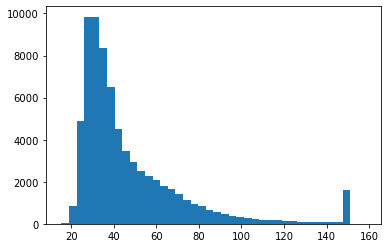

count    71587.000000
mean        46.862177
std         25.596410
min         15.300000
25%         30.400000
50%         37.700000
75%         54.600000
max        158.400000
Name: VALUENUM, dtype: float64


In [76]:
id = 51275
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

## Potassium (ITEMID: 829, 50971, 1535, 227464, 50822)

In [118]:
d = D_ITEMS[['potassium' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Potassium'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [829, 50971, 1535, 227464, 50822] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Potassium']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
126,Potassium,829,Potassium (3.5-5.3),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
127,Potassium,1535,Potassium,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
128,Potassium,1821,potassium phosphate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
129,Potassium,2691,URINE POTASSIUM,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
130,Potassium,2856,Potassium phosphate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
131,Potassium,3578,Potassium Chloride,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
132,Potassium,3725,ABG POTASSIUM,NaN,carevue,chartevents,ABG'S,NaN,NaN,NaN,False
133,Potassium,3792,Potassium (3.5-5.3),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,False
134,Potassium,4194,ABG Potassium,NaN,carevue,chartevents,ABG'S,NaN,NaN,NaN,False
135,Potassium,4381,Potassium Phosphate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False


In [119]:
d = D_LABITEMS[['potassium' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Potassium'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [829, 50971, 1535, 227464, 50822] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'Potassium']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
46,Potassium,50822,"Potassium, Whole Blood",Blood,Blood Gas,6298-4,True
47,Potassium,50833,Potassium,Other Body Fluid,Blood Gas,2821-7,False
48,Potassium,50847,"Potassium, Ascites",Ascites,Chemistry,49789-1,False
49,Potassium,50971,Potassium,Blood,Chemistry,2823-3,True
50,Potassium,51041,"Potassium, Body Fluid",Other Body Fluid,Chemistry,2821-7,False
51,Potassium,51057,"Potassium, Pleural",Pleural,Chemistry,NaN,False
52,Potassium,51064,"Potassium, Stool",Stool,Chemistry,15202-5,False
53,Potassium,51097,"Potassium, Urine",Urine,Chemistry,2828-2,False


In [112]:
D_ITEMS.query('ITEMID == 829 | ITEMID == 1535 | ITEMID == 227464')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
721,1567,748,829,Potassium (3.5-5.3),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
1124,2803,2987,1535,Potassium,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
11617,10303,14825,227464,Potassium (whole blood),Potassium (whole blood),metavision,chartevents,Labs,None,Numeric with tag,NaN


In [116]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 227464")['VALUEUOM'].unique())
set(unit)

{'mEq/L', nan}

In [117]:
LABEVENTS.query("ITEMID == 50822")['VALUEUOM'].unique()

array(['mEq/L'], dtype=object)

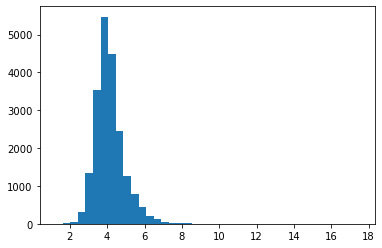

count    20635.000000
mean         4.136460
std          0.788821
min          1.200000
25%          3.600000
50%          4.000000
75%          4.500000
max         17.500000
Name: VALUENUM, dtype: float64


In [80]:
id = 50822
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

## SGPT-Serum Glutamic-Pyruvic Transaminase (ITEMID: 3802)

In [120]:
d = D_ITEMS[['gpt' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['SGPT'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [3802] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'SGPT']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
165,SGPT,3802,SGPT,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True


In [118]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 3802")['VALUEUOM'].unique())
set(unit)

{nan}

## Arterial Base Excess (ITEMID: )

In [121]:
d = D_ITEMS[['base excess' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Arterial_BE'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
# d['CHOOSE'][d[[id in [3802] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Arterial_BE']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
166,Arterial_BE,74,Base Excess,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
167,Arterial_BE,776,Arterial Base Excess,NaN,carevue,chartevents,ABG,NaN,NaN,NaN,False
168,Arterial_BE,3740,Base Excess (other),NaN,carevue,chartevents,Other ABGs,NaN,NaN,NaN,False
169,Arterial_BE,3829,Venous Base Excess,NaN,carevue,chartevents,Venous ABG,NaN,NaN,NaN,False
170,Arterial_BE,4196,Base Excess (cap),NaN,carevue,chartevents,Other ABGs,NaN,NaN,NaN,False
171,Arterial_BE,224828,Arterial Base Excess,Arterial Base Excess,metavision,chartevents,Labs,None,Numeric,NaN,False


In [122]:
d = D_LABITEMS[['base excess' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Arterial_BE'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
# d['CHOOSE'][d[[id in [829, 50971, 1535, 227464, 50822] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'Arterial_BE']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
54,Arterial_BE,50802,Base Excess,Blood,Blood Gas,11555-0,False


## BUN-Blood Urea Nitrogen (ITEMID: 51006, 781, 1162, 225624)

In [123]:
d = D_ITEMS[['bun' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['BUN'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [51006, 781, 1162, 225624] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'BUN']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
172,BUN,781,BUN (6-20),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
173,BUN,1162,BUN,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
174,BUN,3737,BUN (6-20),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,False
175,BUN,5876,bun,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
176,BUN,8220,Effluent BUN,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
177,BUN,225624,BUN,BUN,metavision,chartevents,Labs,None,Numeric,NaN,True
178,BUN,227000,BUN_ApacheIV,BUN_ApacheIV,metavision,chartevents,Scores - APACHE IV (2),None,Numeric,NaN,False
179,BUN,227001,BunScore_ApacheIV,BunScore_ApacheIV,metavision,chartevents,Scores - APACHE IV (2),None,Numeric,NaN,False


In [124]:
d = D_LABITEMS[['urea' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['BUN'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [51006, 781, 1162, 225624] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'BUN']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
55,BUN,50851,"Urea Nitrogen, Ascites",Ascites,Chemistry,12265-5,False
56,BUN,51006,Urea Nitrogen,Blood,Chemistry,3094-0,True
57,BUN,51045,"Urea Nitrogen, Body Fluid",Other Body Fluid,Chemistry,3093-2,False
58,BUN,51104,"Urea Nitrogen, Urine",Urine,Chemistry,3095-7,False


In [119]:
D_ITEMS.query('ITEMID == 781 | ITEMID == 1162 | ITEMID == 225624')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
674,1520,701,781,BUN (6-20),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
876,125,1277,1162,BUN,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
10797,10505,14081,225624,BUN,BUN,metavision,chartevents,Labs,None,Numeric,NaN


In [122]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 225624")['VALUEUOM'].unique())
set(unit)

{'mg/dL', nan}

In [123]:
LABEVENTS.query("ITEMID == 51006")['VALUEUOM'].unique()

array(['mg/dL'], dtype=object)

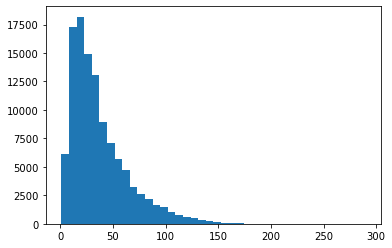

count    111108.000000
mean         37.082752
std          27.779831
min           1.000000
25%          17.000000
50%          29.000000
75%          49.000000
max         290.000000
Name: VALUENUM, dtype: float64


In [84]:
id = 51006
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

## HCO3 (ITEMID: 50882, 227443, 50803)

In [125]:
d = D_ITEMS[['hco3' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['HCO3'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [50882, 227443, 50803] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'HCO3']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
180,HCO3,812,HCO3,NaN,carevue,chartevents,ABG,NaN,NaN,NaN,False
181,HCO3,2468,NAHCO3- MEQ/HR,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
182,HCO3,8235,naHCO3,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
183,HCO3,41824,D5W 150meq NAHCO3,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False
184,HCO3,41983,NAHCO3,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False
185,HCO3,42337,NAHCO3- CC/HR,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False
186,HCO3,42939,1/4ns w 100meqnahco3,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False
187,HCO3,43904,D51/4NS+100MeqNaHCO3,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False
188,HCO3,44166,BICARBONATE-HCO3,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False
189,HCO3,44539,D5W W/ NAHCO3 150MEQ,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False


In [126]:
d = D_LABITEMS.query("ITEMID == 50882 | ITEMID == 50803").iloc[:, 2:]
d['feature'] = ['HCO3'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [50882, 227443, 50803] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'HCO3']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
59,HCO3,50803,"Calculated Bicarbonate, Whole Blood",Blood,Blood Gas,1959-6,True
60,HCO3,50882,Bicarbonate,Blood,Chemistry,1963-8,True


In [124]:
D_ITEMS.query('ITEMID == 227443')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
11596,10074,14757,227443,HCO3 (serum),HCO3 (serum),metavision,chartevents,Labs,None,Numeric with tag,NaN


In [126]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 227443")['VALUEUOM'].unique())
set(unit)

{'mEq/L', nan}

In [128]:
LABEVENTS.query("ITEMID == 50882")['VALUEUOM'].unique()

array(['mEq/L'], dtype=object)

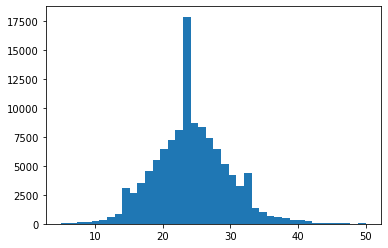

count    115019.000000
mean         24.181966
std           5.481318
min           5.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          50.000000
Name: VALUENUM, dtype: float64


In [87]:
id = 50882
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

## INR-International Normalized Ratio (ITEMID: 1530, 51237, 227467)

In [127]:
d = D_ITEMS[['inr' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['INR'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [1530, 51237, 227467] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'INR']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
203,INR,815,INR (2-4 ref. range),NaN,carevue,chartevents,Coags,NaN,NaN,NaN,False
204,INR,1530,INR,NaN,carevue,chartevents,Coags,NaN,NaN,NaN,True
205,INR,42527,INR BLOOD PRODUCTS,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False
206,INR,44481,ER URINR OUTPUT,NaN,carevue,outputevents,NaN,NaN,NaN,NaN,False
207,INR,220561,ZINR,ZINR,metavision,chartevents,Labs,None,Numeric,NaN,False
208,INR,227467,INR,INR,metavision,chartevents,Labs,None,Numeric with tag,NaN,True


In [128]:
d = D_LABITEMS[['inr' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['INR'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [1530, 51237, 227467] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'INR']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
61,INR,51237,INR(PT),Blood,Hematology,5895-7,True


In [129]:
D_ITEMS.query('ITEMID == 1530 | ITEMID == 227467')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
1119,2798,2982,1530,INR,NaN,carevue,chartevents,Coags,NaN,NaN,NaN
11620,10306,14828,227467,INR,INR,metavision,chartevents,Labs,None,Numeric with tag,NaN


In [132]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 227467")['VALUEUOM'].unique())
set(unit)

{nan}

In [133]:
LABEVENTS.query("ITEMID == 51237")['VALUEUOM'].unique()

array([nan], dtype=object)

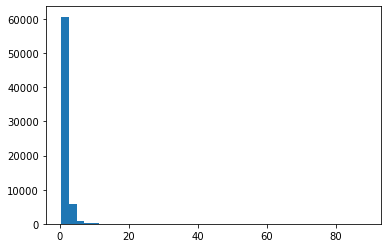

count    67689.000000
mean         1.780712
std          1.243451
min          0.500000
25%          1.200000
50%          1.400000
75%          1.900000
max         88.600000
Name: VALUENUM, dtype: float64


In [90]:
id = 51237
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

## Arterial Lactate (ITEMID: 50813)

In [129]:
d = D_ITEMS[['lactate' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Arterial Lactate'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [50813] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Arterial Lactate']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
209,Arterial Lactate,1634,lactated ringers,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
210,Arterial Lactate,2638,CEREBRAL LACTATE,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
211,Arterial Lactate,2773,sjlactate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
212,Arterial Lactate,30021,Lactated Ringers,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False
213,Arterial Lactate,44370,INAMRINONE LACTATE,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False
214,Arterial Lactate,45532,IR Lactated ringers,NaN,carevue,inputevents_cv,Free Form Intake,NaN,NaN,NaN,False
215,Arterial Lactate,220955,Ringers Lactate,Ringers Lactate,metavision,inputevents_mv,Fluids - Other (Not In Use),mL,Solution,NaN,False
216,Arterial Lactate,220967,Dextrose 5% / Ringers Lactate,Dextrose 5% / Ringers Lactate,metavision,inputevents_mv,Fluids - Other (Not In Use),mL,Solution,NaN,False
217,Arterial Lactate,220968,Dextrose 10% / Ringers Lactate,Dextrose 10% / Ringers Lactate,metavision,inputevents_mv,Fluids - Other (Not In Use),mL,Solution,NaN,False
218,Arterial Lactate,220980,Hextend (Hetastarch 6% in Lactate),Hextend (Hetastarch 6% in Lactate),metavision,inputevents_mv,Fluids - Other (Not In Use),mL,Solution,NaN,False


In [130]:
d = D_LABITEMS[['lactate' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Arterial Lactate'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [50813] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'Arterial Lactate']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
62,Arterial Lactate,50813,Lactate,Blood,Blood Gas,32693-4,True
63,Arterial Lactate,50843,"Lactate Dehydrogenase, Ascites",Ascites,Chemistry,2531-2,False
64,Arterial Lactate,50954,Lactate Dehydrogenase (LD),Blood,Chemistry,2532-0,False
65,Arterial Lactate,51015,"Lactate Dehydrogenase, CSF",Cerebrospinal Fluid (CSF),Chemistry,2528-8,False
66,Arterial Lactate,51054,"Lactate Dehydrogenase, Pleural",Pleural,Chemistry,2530-4,False


In [134]:
LABEVENTS.query("ITEMID == 50813")['VALUEUOM'].unique()

array(['mmol/L'], dtype=object)

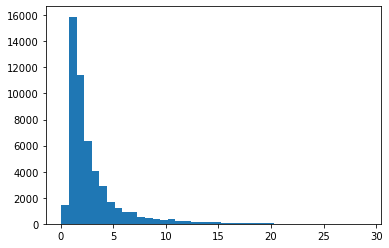

count    50187.000000
mean         2.963857
std          2.896854
min          0.070000
25%          1.300000
50%          2.000000
75%          3.400000
max         29.000000
Name: VALUENUM, dtype: float64


In [91]:
id = 50813
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

## CO2 (ITEMID: 787)

In [131]:
d = D_ITEMS[['carbon dioxide' in str(s).lower() or ' co2' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['CO2'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [787] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'CO2']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
219,CO2,777,Arterial CO2(Calc),NaN,carevue,chartevents,ABG,NaN,NaN,NaN,False
220,CO2,787,Carbon Dioxide,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
221,CO2,857,Venous CO2(Calc),NaN,carevue,chartevents,VBG'S,NaN,NaN,NaN,False
222,CO2,2772,SJ CO2,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
223,CO2,3773,Mix Venous CO2(calc),NaN,carevue,chartevents,Mixed VBGs,NaN,NaN,NaN,False
224,CO2,3810,Total CO2,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,False
225,CO2,3830,Venous CO2,NaN,carevue,chartevents,Venous ABG,NaN,NaN,NaN,False
226,CO2,220235,Arterial CO2 Pressure,PCO2 (Arterial),metavision,chartevents,Labs,mmHg,Numeric,NaN,False
227,CO2,226062,Venous CO2 Pressure,PCO2 (Venous),metavision,chartevents,Labs,mmHg,Numeric,NaN,False


In [132]:
d = D_LABITEMS[['carbon dioxide' in str(s).lower() or ' co2' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['CO2'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [787] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'CO2']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
67,CO2,50804,Calculated Total CO2,Blood,Blood Gas,34728-6,False


In [135]:
D_ITEMS.query('ITEMID == 787')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
680,1526,707,787,Carbon Dioxide,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN


In [136]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 787")['VALUEUOM'].unique())
set(unit)

{nan}

## Creatinine (ITEMID: 791, 1525, 220615, 50912)

In [133]:
d = D_ITEMS[['creatinine' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Creatinine'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [791, 1525, 220615, 50912] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Creatinine']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
228,Creatinine,791,Creatinine (0-1.3),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
229,Creatinine,1525,Creatinine,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
230,Creatinine,3750,Creatinine (0-0.7),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,False
231,Creatinine,5811,urine creatinine,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
232,Creatinine,220615,Creatinine,Creatinine,metavision,chartevents,Labs,None,Numeric,NaN,True
233,Creatinine,226751,CreatinineApacheIIScore,CreatinineApacheIIScore,metavision,chartevents,Scores - APACHE II,None,Numeric,NaN,False
234,Creatinine,226752,CreatinineApacheIIValue,CreatinineApacheIIValue,metavision,chartevents,Scores - APACHE II,None,Numeric,NaN,False
235,Creatinine,227005,Creatinine_ApacheIV,Creatinine_ApacheIV,metavision,chartevents,Scores - APACHE IV (2),None,Numeric,NaN,False


In [134]:
d = D_LABITEMS[['creatinine' in str(s).lower() or ' co2' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Creatinine'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [791, 1525, 220615, 50912] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'Creatinine']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
68,Creatinine,50804,Calculated Total CO2,Blood,Blood Gas,34728-6,False
69,Creatinine,50841,"Creatinine, Ascites",Ascites,Chemistry,12191-3,False
70,Creatinine,50912,Creatinine,Blood,Chemistry,2160-0,True
71,Creatinine,51021,"Creatinine, Joint Fluid",Joint Fluid,Chemistry,14401-4,False
72,Creatinine,51032,"Creatinine, Body Fluid",Other Body Fluid,Chemistry,12190-5,False
73,Creatinine,51052,"Creatinine, Pleural",Pleural,Chemistry,14399-0,False
74,Creatinine,51067,24 hr Creatinine,Urine,Chemistry,2162-6,False
75,Creatinine,51070,"Albumin/Creatinine, Urine",Urine,Chemistry,14958-3,False
76,Creatinine,51073,"Amylase/Creatinine Ratio, Urine",Urine,Chemistry,34235-2,False
77,Creatinine,51080,Creatinine Clearance,Urine,Chemistry,33558-8,False


In [137]:
D_ITEMS.query('ITEMID == 791 | ITEMID == 1525 | ITEMID == 220615')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
683,1529,710,791,Creatinine (0-1.3),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
1114,2793,2977,1525,Creatinine,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
9550,11484,12698,220615,Creatinine,Creatinine,metavision,chartevents,Labs,None,Numeric,NaN


In [140]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 220615")['VALUEUOM'].unique())
set(unit)

{'mg/dL', nan}

In [141]:
LABEVENTS.query("ITEMID == 50912")['VALUEUOM'].unique()

array(['mg/dL'], dtype=object)

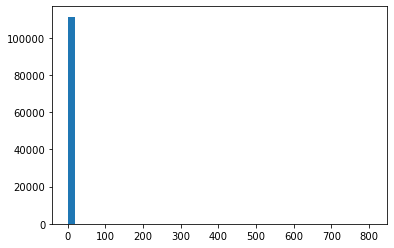

count    111379.000000
mean          1.792941
std           2.925765
min           0.000000
25%           0.800000
50%           1.200000
75%           2.200000
max         808.000000
Name: VALUENUM, dtype: float64


In [95]:
id = 50912
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

## Ionised Calcium (ITEMID: 50808, 816, 225667)

In [135]:
d = D_ITEMS[['ionized calcium' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Ionized Calcium'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [50808, 816, 225667] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Ionized Calcium']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
236,Ionized Calcium,816,Ionized Calcium,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
237,Ionized Calcium,1350,ionized calcium,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
238,Ionized Calcium,8177,Ionized calcium,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
239,Ionized Calcium,8325,IONIZED CALCIUM,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
240,Ionized Calcium,225667,Ionized Calcium,Ionized Calcium,metavision,chartevents,Labs,None,Numeric,NaN,True


In [136]:
d = D_LABITEMS[['calcium' in str(s).lower() or ' co2' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Ionized Calcium'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [50808, 816, 225667] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'Ionized Calcium']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
82,Ionized Calcium,50804,Calculated Total CO2,Blood,Blood Gas,34728-6,False
83,Ionized Calcium,50808,Free Calcium,Blood,Blood Gas,1994-3,True
84,Ionized Calcium,50893,"Calcium, Total",Blood,Chemistry,2000-8,False
85,Ionized Calcium,51029,"Calcium, Body Fluid",Other Body Fluid,Chemistry,15155-5,False
86,Ionized Calcium,51066,24 hr Calcium,Urine,Chemistry,6874-2,False
87,Ionized Calcium,51077,"Calcium, Urine",Urine,Chemistry,2004-0,False
88,Ionized Calcium,51468,Calcium Carbonate Crystals,Urine,Hematology,5773-7,False
89,Ionized Calcium,51469,Calcium Oxalate Crystals,Urine,Hematology,5774-5,False
90,Ionized Calcium,51470,Calcium Phosphate Crystals,Urine,Hematology,5775-2,False


In [142]:
D_ITEMS.query('ITEMID == 816 | ITEMID == 225667')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
708,1554,735,816,Ionized Calcium,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
10828,10536,14112,225667,Ionized Calcium,Ionized Calcium,metavision,chartevents,Labs,None,Numeric,NaN


In [144]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 225667")['VALUEUOM'].unique())
set(unit)

{'mmol/L', nan}

In [145]:
LABEVENTS.query("ITEMID == 50808")['VALUEUOM'].unique()

array(['mmol/L'], dtype=object)

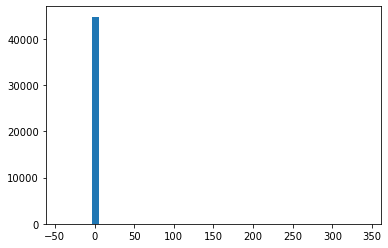

count    44858.000000
mean         1.164780
std          3.533158
min        -42.000000
25%          1.050000
50%          1.110000
75%          1.160000
max        342.000000
Name: VALUENUM, dtype: float64


In [99]:
id = 225667
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

## PT-Prothrombin Time (ITEMID: 1286, 824, 227465, 51274)

In [137]:
d = D_ITEMS[['pt ' in str(s).lower() or ' pt' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['PT'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [1286, 824, 227465, 51274] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)

d = D_ITEMS[[id in [1286, 824, 227465, 51274] for id in D_ITEMS['ITEMID']]].iloc[:, 2:]
d['feature'] = ['PT'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [1286, 824, 227465, 51274] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'PT']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
241,PT,121,Chest PT [Right],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
242,PT,508,PT Splint #1 [Location],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
243,PT,509,PT Splint #2 [Location],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
244,PT,510,PT Splint #3 [Location],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
245,PT,511,PT Splint #4 [Location],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
246,PT,944,Chest PT,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
247,PT,1056,chest pt,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
248,PT,2150,CHEST PT,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
249,PT,2585,chest PT,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
250,PT,4736,COSOPT DROPS,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False


In [138]:
d = D_LABITEMS[[id in [1286, 824, 227465, 51274] for id in D_LABITEMS['ITEMID']]].iloc[:, 2:]
d['feature'] = ['PT'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [1286, 824, 227465, 51274] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'PT']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
91,PT,51274,PT,Blood,Hematology,5902-2,True


In [146]:
D_ITEMS.query('ITEMID == 824 | ITEMID == 1286 | ITEMID == 227465')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
716,1562,743,824,PT(11-13.5),NaN,carevue,chartevents,Coags,NaN,NaN,NaN
925,1197,1326,1286,PT,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
11618,10304,14826,227465,Prothrombin time,PT,metavision,chartevents,Labs,None,Numeric with tag,NaN


In [149]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 227465")['VALUEUOM'].unique())
set(unit)

{nan, 'sec'}

In [150]:
LABEVENTS.query("ITEMID == 51274")['VALUEUOM'].unique()

array(['sec'], dtype=object)

## Platelets Count (ITEMID: 51265, 828, 227457)

In [139]:
d = D_ITEMS[['platelet' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Platelets Count'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [51265, 828, 227457] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Platelets Count']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
276,Platelets Count,828,Platelets,NaN,carevue,chartevents,Hematology,NaN,NaN,NaN,True
277,Platelets Count,3789,Platelet (150-440),NaN,carevue,chartevents,Heme/Coag,NaN,NaN,NaN,False
278,Platelets Count,6256,Platelet Count,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
279,Platelets Count,30006,Platelets,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False
280,Platelets Count,30105,OR Platelets,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False
281,Platelets Count,225170,Platelets,Platelets,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,False
282,Platelets Count,225678,ZPlatelet Count,ZPlatelet Count,metavision,chartevents,Labs,None,Numeric,NaN,False
283,Platelets Count,226369,OR Platelet Intake,OR Platelet Intake,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,False
284,Platelets Count,227071,PACU Platelet Intake,PACU Platelet Intake,metavision,inputevents_mv,Blood Products/Colloids,mL,Solution,NaN,False
285,Platelets Count,227457,Platelet Count,Platelet Count,metavision,chartevents,Labs,None,Numeric with tag,NaN,True


In [140]:
d = D_LABITEMS[['platelet' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Platelets Count'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [1286, 824, 227465, 51274] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'Platelets Count']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
92,Platelets Count,51240,Large Platelets,Blood,Hematology,34167-7,False
93,Platelets Count,51264,Platelet Clumps,Blood,Hematology,40741-1,False
94,Platelets Count,51265,Platelet Count,Blood,Hematology,777-3,False
95,Platelets Count,51266,Platelet Smear,Blood,Hematology,778-1,False


In [151]:
D_ITEMS.query('ITEMID == 828 | ITEMID == 227457')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
720,1566,747,828,Platelets,NaN,carevue,chartevents,Hematology,NaN,NaN,NaN
11610,10088,14771,227457,Platelet Count,Platelet Count,metavision,chartevents,Labs,None,Numeric with tag,NaN


In [153]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 227457")['VALUEUOM'].unique())
set(unit)

{'K/uL', nan}

In [154]:
LABEVENTS.query("ITEMID == 51265")['VALUEUOM'].unique()

array(['K/uL'], dtype=object)

## SGOT-Serum Glutamic-Oxaloacetic Transaminse (ITEMID: 3801)

In [141]:
d = D_ITEMS[['got' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['SGOT'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [3801] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'SGOT']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
286,SGOT,3801,SGOT,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True


In [156]:
D_ITEMS.query('ITEMID == 3801')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
2628,2718,2902,3801,SGOT,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN


In [157]:
D_ITEMS.query('ITEMID == 3801')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
2628,2718,2902,3801,SGOT,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN


In [158]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 3801")['VALUEUOM'].unique())
set(unit)

{nan}

## Total bilirubun (ITEMID: 848, 225690, 1538, 50885)

In [142]:
d = D_ITEMS[[' bili' in str(s).lower() or 'bilirubin' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Total bilirubun'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [848, 225690, 1538, 50885] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Total bilirubun']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
287,Total bilirubun,803,Direct Bili (0-0.3),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,False
288,Total bilirubun,848,Total Bili (0-1.5),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
289,Total bilirubun,1527,Direct Bili,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,False
290,Total bilirubun,1538,Total Bili,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
291,Total bilirubun,3765,Indirect Bili(0-1.0),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,False
292,Total bilirubun,4948,Bilirubin,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
293,Total bilirubun,5469,lytes and bili,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
294,Total bilirubun,5970,"LYTES, BILI",NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
295,Total bilirubun,6001,Rebound bili,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
296,Total bilirubun,6016,Neo Bili,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False


In [143]:
d = D_LABITEMS[['bili' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Total bilirubun'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [848, 225690, 1538, 50885] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'Total bilirubun']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
96,Total bilirubun,50838,"Bilirubin, Total, Ascites",Ascites,Chemistry,14422-0,False
97,Total bilirubun,50883,"Bilirubin, Direct",Blood,Chemistry,1968-7,False
98,Total bilirubun,50884,"Bilirubin, Indirect",Blood,Chemistry,1971-1,False
99,Total bilirubun,50885,"Bilirubin, Total",Blood,Chemistry,1975-2,True
100,Total bilirubun,51012,"Bilirubin, Total, CSF",Cerebrospinal Fluid (CSF),Chemistry,1973-7,False
101,Total bilirubun,51028,"Bilirubin, Total, Body Fluid",Other Body Fluid,Chemistry,1974-5,False
102,Total bilirubun,51049,"Bilirubin, Total, Pleural",Pleural,Chemistry,14421-2,False
103,Total bilirubun,51096,Porphobilinogen Screen,Urine,Chemistry,2809-2,False
104,Total bilirubun,51464,Bilirubin,Urine,Hematology,5770-3,False
105,Total bilirubun,51465,Bilirubin Crystals,Urine,Hematology,5771-1,False


In [159]:
D_ITEMS.query('ITEMID == 848 | ITEMID == 1538 | ITEMID == 225690')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
735,759,1136,848,Total Bili (0-1.5),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
1127,2806,2990,1538,Total Bili,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
10845,10553,14129,225690,Total Bilirubin,Total Bilirubin,metavision,chartevents,Labs,None,Numeric,NaN


In [162]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 225690")['VALUEUOM'].unique())
set(unit)

{'mg/dL', nan}

In [163]:
LABEVENTS.query("ITEMID == 50885")['VALUEUOM'].unique()

array(['mg/dL'], dtype=object)

## White Blood Cell Count (ITEMID: 861, 1542, 220546, 51301, 51300, 1127)

In [144]:
d = D_ITEMS[['white' in str(s).lower() or 'wbc' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['White Blood Cell Count'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [861, 1542, 220546, 51301, 51300, 1127] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'White Blood Cell Count']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
306,White Blood Cell Count,861,"WBC (4-11,000)",NaN,carevue,chartevents,Hematology,NaN,NaN,NaN,True
307,White Blood Cell Count,1127,"WBC (4-11,000)",NaN,carevue,chartevents,Hematology,NaN,NaN,NaN,True
308,White Blood Cell Count,1542,WBC,NaN,carevue,chartevents,Hematology,NaN,NaN,NaN,True
309,White Blood Cell Count,3834,WhiteBloodC 4.0-11.0,NaN,carevue,chartevents,Heme/Coag,NaN,NaN,NaN,False
310,White Blood Cell Count,4200,WBC 4.0-11.0,NaN,carevue,chartevents,Heme/Coag,NaN,NaN,NaN,False
311,White Blood Cell Count,220546,WBC,WBC,metavision,chartevents,Labs,None,Numeric,NaN,True
312,White Blood Cell Count,226779,WbcApacheIIScore,WbcApacheIIScore,metavision,chartevents,Scores - APACHE II,None,Numeric,NaN,False
313,White Blood Cell Count,226780,WBCApacheIIValue,WBCApacheIIValue,metavision,chartevents,Scores - APACHE II,None,Numeric,NaN,False
314,White Blood Cell Count,227062,WBC_ApacheIV,WBC_ApacheIV,metavision,chartevents,Scores - APACHE IV (2),None,Numeric,NaN,False
315,White Blood Cell Count,227063,WBCScore_ApacheIV,WBCScore_ApacheIV,metavision,chartevents,Scores - APACHE IV (2),None,Numeric,NaN,False


In [145]:
d = D_LABITEMS[['white' in str(s).lower() or 'wbc' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['White Blood Cell Count'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [861, 1542, 220546, 51301, 51300, 1127] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'White Blood Cell Count']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
107,White Blood Cell Count,51128,"WBC, Ascites",Ascites,Hematology,26468-9,False
108,White Blood Cell Count,51300,WBC Count,Blood,Hematology,26464-8,True
109,White Blood Cell Count,51301,White Blood Cells,Blood,Hematology,804-5,True
110,White Blood Cell Count,51363,"WBC, CSF",Cerebrospinal Fluid (CSF),Hematology,26465-5,False
111,White Blood Cell Count,51384,"WBC, Joint Fluid",Joint Fluid,Hematology,26469-7,False
112,White Blood Cell Count,51439,"WBC, Other Fluid",Other Body Fluid,Hematology,26466-3,False
113,White Blood Cell Count,51458,"WBC, Pleural",Pleural,Hematology,26467-1,False
114,White Blood Cell Count,51516,WBC,Urine,Hematology,5821-4,False
115,White Blood Cell Count,51517,WBC Casts,Urine,Hematology,5820-6,False
116,White Blood Cell Count,51518,WBC Clumps,Urine,Hematology,NaN,False


In [164]:
D_ITEMS.query('ITEMID == 861 | ITEMID == 1542 | ITEMID == 1127 | ITEMID == 220546')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
748,772,1149,861,"WBC (4-11,000)",NaN,carevue,chartevents,Hematology,NaN,NaN,NaN
871,120,1272,1127,"WBC (4-11,000)",NaN,carevue,chartevents,Hematology,NaN,NaN,NaN
1131,2810,2994,1542,WBC,NaN,carevue,chartevents,Hematology,NaN,NaN,NaN
9538,11472,12686,220546,WBC,WBC,metavision,chartevents,Labs,None,Numeric,NaN


In [168]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 220546")['VALUEUOM'].unique())
set(unit)

{'K/uL', nan}

In [170]:
LABEVENTS.query("ITEMID == 51301")['VALUEUOM'].unique()

array(['K/uL'], dtype=object)

## Diastolic Blood Pressure (ITEMID: 224643, 225310, 220180, 8555, 220051, 8368, 8441, 8440)

In [146]:
d = D_ITEMS[[('blood pressure' in str(s).lower() or 'bp' in str(s).lower()) and 'diastolic' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Diastolic Blood Pressure'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [224643, 225310, 220180, 8555, 220051, 8368, 8441, 8440] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Diastolic Blood Pressure']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
316,Diastolic Blood Pressure,8364,ABP [Diastolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
317,Diastolic Blood Pressure,8368,Arterial BP [Diastolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
318,Diastolic Blood Pressure,8440,Manual BP [Diastolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
319,Diastolic Blood Pressure,8441,NBP [Diastolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
320,Diastolic Blood Pressure,8444,Orthostat BP sitting [Diastolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
321,Diastolic Blood Pressure,8445,OrthostatBP standing [Diastolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
322,Diastolic Blood Pressure,8446,Orthostatic BP lying [Diastolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
323,Diastolic Blood Pressure,8502,BP Cuff [Diastolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
324,Diastolic Blood Pressure,8503,BP Left Arm [Diastolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
325,Diastolic Blood Pressure,8504,BP Left Leg [Diastolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False


In [180]:
D_ITEMS.query('ITEMID == 8441 | ITEMID == 8368 | ITEMID == 8555 | ITEMID == 220051 | ITEMID == 220180 | ITEMID == 224643 | ITEMID == 225310')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
4829,4637,4831,8368,Arterial BP [Diastolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
4902,4710,4904,8441,NBP [Diastolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
5016,4823,5017,8555,Arterial BP #2 [Diastolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
9501,11503,12717,220051,Arterial Blood Pressure diastolic,ABPd,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN
9519,11521,12735,220180,Non Invasive Blood Pressure diastolic,NBPd,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN
10150,11323,13424,224643,Manual Blood Pressure Diastolic Left,Manual BPd L,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN
10598,12444,13688,225310,ART BP Diastolic,ART BP Diastolic,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN


In [186]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 225310")['VALUEUOM'].unique())
set(unit)

{'mmHg'}

## Systolic Blood Pressure (ITEMID: 442, 227243, 224167, 220179, 225309)

In [147]:
d = D_ITEMS[[('blood pressure' in str(s).lower() or 'bp' in str(s).lower())  and 'systolic' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Systolic Blood Pressure'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [442, 227243, 224167, 220179, 225309] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Systolic Blood Pressure']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
336,Systolic Blood Pressure,6,ABP [Systolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
337,Systolic Blood Pressure,51,Arterial BP [Systolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
338,Systolic Blood Pressure,442,Manual BP [Systolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
339,Systolic Blood Pressure,455,NBP [Systolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
340,Systolic Blood Pressure,480,Orthostat BP sitting [Systolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
341,Systolic Blood Pressure,482,OrthostatBP standing [Systolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
342,Systolic Blood Pressure,484,Orthostatic BP lying [Systolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
343,Systolic Blood Pressure,3313,BP Cuff [Systolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
344,Systolic Blood Pressure,3315,BP Left Arm [Systolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
345,Systolic Blood Pressure,3317,BP Left Leg [Systolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False


In [187]:
D_ITEMS.query('ITEMID == 442 | ITEMID == 220179 | ITEMID == 224167 | ITEMID == 225309 | ITEMID == 227243')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
381,671,408,442,Manual BP [Systolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
9518,11520,12734,220179,Non Invasive Blood Pressure systolic,NBPs,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN
9958,9314,13050,224167,Manual Blood Pressure Systolic Left,Manual BPs L,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN
10597,12443,13687,225309,ART BP Systolic,ART BP Systolic,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN
11546,9442,14619,227243,Manual Blood Pressure Systolic Right,Manual BPs R,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN


In [193]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 227243")['VALUEUOM'].unique())
set(unit)

{'mmHg'}

## Mean Blood Pressure (ITEMID: 456, 220181, 224, 225312, 220052, 52, 6702, 224322)

In [148]:
d = D_ITEMS[['blood pressure mean' in str(s).lower() or ('bp' in str(s).lower() and 'mean' in str(s).lower()) for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Mean Blood Pressure'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [456, 220181, 224, 225312, 220052, 52, 6702, 224322] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Mean Blood Pressure']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
356,Mean Blood Pressure,52,Arterial BP Mean,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
357,Mean Blood Pressure,224,IABP Mean,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
358,Mean Blood Pressure,443,Manual BP Mean(calc),NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
359,Mean Blood Pressure,456,NBP Mean,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
360,Mean Blood Pressure,2732,Femoral ABP (Mean),NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
361,Mean Blood Pressure,3312,BP Cuff [Mean],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
362,Mean Blood Pressure,3314,BP Left Arm [Mean],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
363,Mean Blood Pressure,3316,BP Left Leg [Mean],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
364,Mean Blood Pressure,3318,BP PAL [Mean],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
365,Mean Blood Pressure,3320,BP Right Arm [Mean],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False


In [194]:
D_ITEMS.query('ITEMID == 52 | ITEMID == 224 | ITEMID == 456 | ITEMID == 6702 | ITEMID == 220052 | ITEMID == 220181 | ITEMID == 224322 | ITEMID == 225312')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
31,321,58,52,Arterial BP Mean,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
195,485,222,224,IABP Mean,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
393,683,420,456,NBP Mean,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
4124,5063,4326,6702,Arterial BP Mean #2,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
9502,11504,12718,220052,Arterial Blood Pressure mean,ABPm,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN
9520,11522,12736,220181,Non Invasive Blood Pressure mean,NBPm,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN
10018,10164,13110,224322,IABP Mean,MAP - Assisted,metavision,chartevents,IABP,mmHg,Numeric,NaN
10599,12445,13689,225312,ART BP mean,ART BP mean,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN


In [203]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 225312")['VALUEUOM'].unique())
set(unit)

{'mmHg'}

## PaCO2 - Partial pressure of carbon dioxide (ITEMID: 226062, 778, 220235, 50818)

In [149]:
d = D_ITEMS[['co2 pressure' in str(s).lower() or 'paco2' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['PaCO2'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [226062, 778, 220235, 50818] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'PaCO2']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
378,PaCO2,778,Arterial PaCO2,NaN,carevue,chartevents,ABG,NaN,NaN,NaN,True
379,PaCO2,220235,Arterial CO2 Pressure,PCO2 (Arterial),metavision,chartevents,Labs,mmHg,Numeric,NaN,True
380,PaCO2,226062,Venous CO2 Pressure,PCO2 (Venous),metavision,chartevents,Labs,mmHg,Numeric,NaN,True
381,PaCO2,227038,PHPaCO2Score_ApacheIV,PHPaCO2Score_ApacheIV,metavision,chartevents,Scores - APACHE IV (2),None,Numeric,NaN,False


In [150]:
d = D_LABITEMS[['co2' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['PaCO2'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [226062, 778, 220235, 50818] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'PaCO2']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
118,PaCO2,50804,Calculated Total CO2,Blood,Blood Gas,34728-6,False
119,PaCO2,50818,pCO2,Blood,Blood Gas,11557-6,True
120,PaCO2,50830,"pCO2, Body Fluid",Other Body Fluid,Blood Gas,2023-0,False


In [204]:
D_ITEMS.query('ITEMID == 778 | ITEMID == 220235 | ITEMID == 226062')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
671,1517,698,778,Arterial PaCO2,NaN,carevue,chartevents,ABG,NaN,NaN,NaN
9527,11529,12743,220235,Arterial CO2 Pressure,PCO2 (Arterial),metavision,chartevents,Labs,mmHg,Numeric,NaN
11136,11644,14344,226062,Venous CO2 Pressure,PCO2 (Venous),metavision,chartevents,Labs,mmHg,Numeric,NaN


In [207]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 226062")['VALUEUOM'].unique())
set(unit)

{'mmHg'}

## PaO2 - partial pressure of oxygen (ITEMID: 779)

In [151]:
d = D_ITEMS[['pao2' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['PaO2'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [779] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'PaO2']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
382,PaO2,490,PAO2,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
383,PaO2,779,Arterial PaO2,NaN,carevue,chartevents,ABG,NaN,NaN,NaN,True


In [152]:
d = D_LABITEMS[['o2' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['PaO2'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [779] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'PaO2']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
121,PaO2,50804,Calculated Total CO2,Blood,Blood Gas,34728-6,False
122,PaO2,50815,O2 Flow,Blood,Blood Gas,3151-8,False
123,PaO2,50818,pCO2,Blood,Blood Gas,11557-6,False
124,PaO2,50821,pO2,Blood,Blood Gas,11556-8,False
125,PaO2,50823,Required O2,Blood,Blood Gas,NaN,False
126,PaO2,50830,"pCO2, Body Fluid",Other Body Fluid,Blood Gas,2023-0,False
127,PaO2,50832,"pO2, Body Fluid",Other Body Fluid,Blood Gas,2706-0,False


## FiO2 - fractional inspired oxygen (ITEMID: 189, 727, 223835)

In [153]:
d = D_ITEMS[['fio2' in str(s).lower() or 'inspired' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['FiO2'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [189, 727, 223835] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'FiO2']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
384,FiO2,185,FIO2 Alarm-High,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
385,FiO2,186,FIO2 Alarm-Low,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
386,FiO2,189,FiO2 (Analyzed),NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
387,FiO2,190,FiO2 Set,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
388,FiO2,191,FiO2/O2 Delivered,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
389,FiO2,417,Inspired Gas Temp,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
390,FiO2,727,Vision FiO2,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
391,FiO2,1040,BIpap FIO2,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
392,FiO2,1206,HFO FIO2:,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
393,FiO2,1863,HFO-FiO2,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False


In [208]:
D_ITEMS.query('ITEMID == 189 | ITEMID == 727 | ITEMID == 223835')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
163,453,190,189,FiO2 (Analyzed),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
649,1495,676,727,Vision FiO2,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
9767,12413,12804,223835,Inspired O2 Fraction,FiO2,metavision,chartevents,Respiratory,None,Numeric,NaN


In [211]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 223835")['VALUEUOM'].unique())
set(unit)

{nan}

In [262]:
a = CHARTEVENTS1.query("ITEMID == 189")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query("ITEMID == 189")], axis=0)
a['VALUENUM'].describe()

count    105.000000
mean       0.563619
std        0.165519
min        0.400000
25%        0.400000
50%        0.500000
75%        0.600000
max        1.000000
Name: VALUENUM, dtype: float64

In [263]:
a = CHARTEVENTS1.query("ITEMID == 727")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query("ITEMID == 727")], axis=0)
a['VALUENUM'].describe()

count      9.000000
mean      69.444444
std       29.202359
min       40.000000
25%       45.000000
50%       50.000000
75%      100.000000
max      100.000000
Name: VALUENUM, dtype: float64

In [287]:
a = CHARTEVENTS1.query("ITEMID == 223835")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query("ITEMID == 223835")], axis=0)
a['VALUENUM'].describe()

count    419752.000000
mean         46.769989
std          22.409881
min           0.000000
25%          40.000000
50%          40.000000
75%          50.000000
max        7050.000000
Name: VALUENUM, dtype: float64

## Respiratory Rate (ITEMID: 224422, 618, 220210, 224689, 614, 651, 224690, 615)

In [154]:
d = D_ITEMS[['respiratory rate' in str(s).lower() or ' rr' in str(s).lower() or 'resp rate' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Respiratory Rate'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [224422, 618, 220210, 224689, 614, 651, 224690, 615] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Respiratory Rate']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
409,Respiratory Rate,614,Resp Rate (Spont),NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
410,Respiratory Rate,615,Resp Rate (Total),NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
411,Respiratory Rate,618,Respiratory Rate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
412,Respiratory Rate,619,Respiratory Rate Set,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
413,Respiratory Rate,651,Spon RR (Mech.),NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
414,Respiratory Rate,1635,HIGH Resp Rate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
415,Respiratory Rate,1884,Spont Resp rate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
416,Respiratory Rate,3142,high rr,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
417,Respiratory Rate,3603,Resp Rate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
418,Respiratory Rate,5880,low rr,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False


In [212]:
D_ITEMS.query('ITEMID == 618 | ITEMID == 614 | ITEMID == 651 | ITEMID == 615 | ITEMID == 220210 | ITEMID == 224422 | ITEMID == 224686 | ITEMID == 224690')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
544,259,571,614,Resp Rate (Spont),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
545,260,572,615,Resp Rate (Total),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
548,263,575,618,Respiratory Rate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
577,1423,604,651,Spon RR (Mech.),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
9522,11524,12738,220210,Respiratory Rate,RR,metavision,chartevents,Respiratory,insp/min,Numeric,NaN
10065,10413,13339,224422,Spont RR,Spont RR,metavision,chartevents,Respiratory,bpm,Numeric,NaN
10179,10050,13242,224686,Tidal Volume (spontaneous),Tidal Volume (spontaneous),metavision,chartevents,Respiratory,mL,Numeric,NaN
10183,10054,13246,224690,Respiratory Rate (Total),Respiratory Rate (Total),metavision,chartevents,Respiratory,insp/min,Numeric,NaN


In [222]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 224690")['VALUEUOM'].unique())
set(unit)

{'insp/min'}

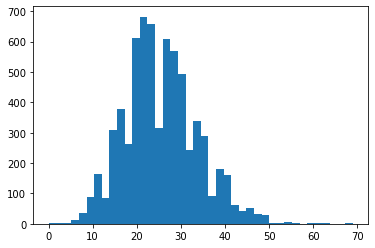

count    6824.000000
mean       25.547113
std         8.284217
min         0.000000
25%        20.000000
50%        25.000000
75%        31.000000
max        69.000000
Name: VALUENUM, dtype: float64


In [101]:
id = 220210
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

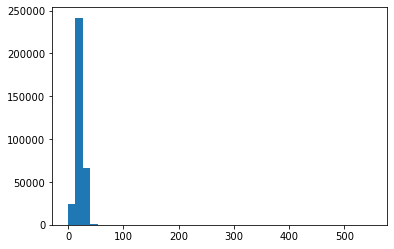

count    333624.000000
mean         21.474526
std           7.220466
min          -1.000000
25%          18.000000
50%          22.000000
75%          26.000000
max         550.000000
Name: VALUENUM, dtype: float64


In [104]:
id = 224690
a = CHARTEVENTS1.query(f"ITEMID == {id}")
i = paths.index('CHARTEVENTS1.csv')
for j in range(9):
    a = pd.concat([a, datas[i + j].query(f"ITEMID == {id}")], axis=0)
a = pd.concat([a, LABEVENTS.query(f"ITEMID == {id}")], axis=0)
plt.hist(a['VALUENUM'].values, bins=40)
plt.show()
print(a['VALUENUM'].describe())

## Temperature - Celsius (ITEMID: 223761, 677, 676, 679, 678, 223762)

In [155]:
d = D_ITEMS[['temperature' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Temperature'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [223761, 677, 676, 679, 678, 223762] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Temperature']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
432,Temperature,591,RLE [Temperature],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
433,Temperature,597,RUE [Temperature],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
434,Temperature,645,Skin [Temperature],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
435,Temperature,676,Temperature C,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
436,Temperature,677,Temperature C (calc),NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
437,Temperature,678,Temperature F,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
438,Temperature,679,Temperature F (calc),NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
439,Temperature,8537,"Temp/Iso/Warmer [Temperature, degrees C]",NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
440,Temperature,223761,Temperature Fahrenheit,Temperature F,metavision,chartevents,Routine Vital Signs,?F,Numeric,NaN,True
441,Temperature,223762,Temperature Celsius,Temperature C,metavision,chartevents,Routine Vital Signs,?C,Numeric,NaN,True


In [223]:
D_ITEMS.query('ITEMID == 676 | ITEMID == 677 | ITEMID == 678 | ITEMID == 679 | ITEMID == 223761 | ITEMID == 223762')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
600,1446,627,676,Temperature C,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
601,1447,628,677,Temperature C (calc),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
602,1448,629,678,Temperature F,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
603,1449,630,679,Temperature F (calc),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
9720,12366,12757,223761,Temperature Fahrenheit,Temperature F,metavision,chartevents,Routine Vital Signs,?F,Numeric,NaN
9721,12367,12758,223762,Temperature Celsius,Temperature C,metavision,chartevents,Routine Vital Signs,?C,Numeric,NaN


In [229]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 223762")['VALUEUOM'].unique())
set(unit)

{'?C'}

## Weight - kg (ITEMID: 226531, 763, 224639, 226512)

In [156]:
d = D_ITEMS[['weight' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Weight'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [226531, 763, 224639, 226512] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Weight']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
448,Weight,580,Previous Weight,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
449,Weight,581,Previous WeightF,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
450,Weight,733,Weight Change,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
451,Weight,763,Daily Weight,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
452,Weight,3580,Present Weight (kg),NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
453,Weight,3581,Present Weight (lb),NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
454,Weight,3582,Present Weight (oz),NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
455,Weight,3583,Previous Weight (kg),NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
456,Weight,3692,Weight Change (gms),NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
457,Weight,3693,Weight Kg,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False


In [230]:
D_ITEMS.query('ITEMID == 763 | ITEMID == 224639 | ITEMID == 226512 | ITEMID == 226531')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
661,1507,688,763,Daily Weight,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
10146,11319,13420,224639,Daily Weight,Daily Weight,metavision,chartevents,General,kg,Numeric,NaN
11249,11875,14391,226512,Admission Weight (Kg),Admission Weight (Kg),metavision,chartevents,General,kg,Numeric,NaN
11259,11885,14401,226531,Admission Weight (lbs.),Admission Weight (lbs.),metavision,chartevents,General,None,Numeric,NaN


In [234]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 226531")['VALUEUOM'].unique())
set(unit)

{nan}

## Heart Rate (ITEMID: 211, 220045)

In [157]:
d = D_ITEMS[['heart rate' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Heart Rate'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [211, 220045] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Heart Rate']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
471,Heart Rate,211,Heart Rate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
472,Heart Rate,3494,Lowest Heart Rate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
473,Heart Rate,220045,Heart Rate,HR,metavision,chartevents,Routine Vital Signs,bpm,Numeric,NaN,True
474,Heart Rate,220046,Heart rate Alarm - High,HR Alarm - High,metavision,chartevents,Alarms,bpm,Numeric,NaN,False
475,Heart Rate,220047,Heart Rate Alarm - Low,HR Alarm - Low,metavision,chartevents,Alarms,bpm,Numeric,NaN,False


In [235]:
D_ITEMS.query('ITEMID == 211 | ITEMID == 220045')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
185,475,212,211,Heart Rate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
9496,11498,12712,220045,Heart Rate,HR,metavision,chartevents,Routine Vital Signs,bpm,Numeric,NaN


In [237]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 220045")['VALUEUOM'].unique())
set(unit)

{'bpm'}

## SpO2 - Oxygen Saturation (ITEMID: 646, 50817, 834, 220277)

In [158]:
d = D_ITEMS[['o2' in str(s).lower() and ('sa' in str(s).lower() or 'sp' in str(s).lower()) for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['SpO2'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [646, 50817, 834, 220277] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'SpO2']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
476,SpO2,646,SpO2,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,True
477,SpO2,823,Mixed Venous O2% Sat,NaN,carevue,chartevents,Blood Gases,NaN,NaN,NaN,False
478,SpO2,834,SaO2,NaN,carevue,chartevents,ABG's,NaN,NaN,NaN,True
479,SpO2,2396,MIVED VENOUS O2 SAT,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
480,SpO2,2574,MVO2 SAT,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
481,SpO2,2767,Mixed Venous SaO2,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
482,SpO2,2842,JV O2 Sat,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
483,SpO2,2933,SVO2 SAT,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
484,SpO2,2955,JVO2 SAT,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
485,SpO2,3288,O2 sat [Pre],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False


In [159]:
d = D_LABITEMS.query("ITEMID == 50817").iloc[:, 2:]
d['feature'] = ['SpO2'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [646, 50817, 834, 220277] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'SpO2']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
128,SpO2,50817,Oxygen Saturation,Blood,Blood Gas,20564-1,True


In [238]:
D_ITEMS.query('ITEMID == 646 | ITEMID == 834 | ITEMID == 220277')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
572,1418,599,646,SpO2,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
725,749,1126,834,SaO2,NaN,carevue,chartevents,ABG's,NaN,NaN,NaN
9530,12355,12746,220277,O2 saturation pulseoxymetry,SpO2,metavision,chartevents,Respiratory,%,Numeric,NaN


In [242]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 220277")['VALUEUOM'].unique())
set(unit)

{'%'}

## Chloride (ITENID: 50806, 220602, 226536, 1523, 788, 50902)

In [160]:
d = D_ITEMS[['chloride' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Chloride'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
d['CHOOSE'][d[[id in [50806, 220602, 226536, 1523, 788, 50902] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Chloride']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
527,Chloride,788,Chloride (100-112),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
528,Chloride,1523,Chloride,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,True
529,Chloride,3578,Potassium Chloride,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
530,Chloride,3624,Sodium Chloride,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
531,Chloride,3747,Chloride (100-112),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN,False
532,Chloride,4193,ABG Chloride,NaN,carevue,chartevents,ABG's,NaN,NaN,NaN,False
533,Chloride,5753,Calcium Chloride,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
534,Chloride,30022,Calcium Chloride,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False
535,Chloride,30296,Sodium Chloride,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False
536,Chloride,30297,Potassium Chloride,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False


In [161]:
d = D_LABITEMS[['chloride' in str(s).lower() for s in D_LABITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Chloride'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'FLUID', 'CATEGORY', 'LOINC_CODE', 'CHOOSE']]
d['CHOOSE'][d[[id in [50806, 220602, 226536, 1523, 788, 50902] for id in d['ITEMID']]].index] = True
lab_feature = pd.concat([lab_feature, d], ignore_index=True)
lab_feature[lab_feature['feature'] == 'Chloride']

,feature,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE,CHOOSE
129,Chloride,50806,"Chloride, Whole Blood",Blood,Blood Gas,2069-3,True
130,Chloride,50839,"Chloride, Ascites",Ascites,Chemistry,33366-6,False
131,Chloride,50902,Chloride,Blood,Chemistry,2075-0,True
132,Chloride,51013,"Chloride, CSF",Cerebrospinal Fluid (CSF),Chemistry,NaN,False
133,Chloride,51030,"Chloride, Body Fluid",Other Body Fluid,Chemistry,2072-7,False
134,Chloride,51050,"Chloride, Pleural",Pleural,Chemistry,53627-6,False
135,Chloride,51062,"Chloride, Stool",Stool,Chemistry,15158-9,False
136,Chloride,51078,"Chloride, Urine",Urine,Chemistry,2078-4,False


In [171]:
D_ITEMS.query('ITEMID == 788 | ITEMID == 1523 | ITEMID == 220602 | ITEMID == 226536')

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
681,1527,708,788,Chloride (100-112),NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
1112,2791,2975,1523,Chloride,NaN,carevue,chartevents,Chemistry,NaN,NaN,NaN
9546,11480,12694,220602,Chloride (serum),Chloride (serum),metavision,chartevents,Labs,None,Numeric,NaN
11263,11889,14405,226536,Chloride (whole blood),Chloride (whole blood),metavision,chartevents,Labs,None,Numeric,NaN


In [176]:
i = paths.index('CHARTEVENTS1.csv')
unit = []
for j in range(9):
    unit += list(datas[i + j].query("ITEMID == 226536")['VALUEUOM'].unique())
set(unit)

{'mEq/L', nan}

In [178]:
LABEVENTS.query("ITEMID == 50902")['VALUEUOM'].unique()

array(['mEq/L'], dtype=object)

## Mechanical Ventilation (ITEMID: 225792, 225794)

In [98]:
D_ITEMS[['ventilation' in str(s).lower() for s in D_ITEMS['LABEL']]]

,Unnamed: 0,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
10592,12438,13682,225303,Mask Ventilation (Intubation),Mask Ventilation (Intubation),metavision,chartevents,Intubation,NaN,Text,NaN
10932,10213,13977,225792,Invasive Ventilation,Invasive Ventilation,metavision,procedureevents_mv,2-Ventilation,None,Process,NaN
10933,10214,13978,225794,Non-invasive Ventilation,Non-invasive Ventilation,metavision,procedureevents_mv,2-Ventilation,None,Process,NaN


In [278]:
D_LABITEMS[['ventilat' in str(s).lower() for s in D_LABITEMS['LABEL']]]

,Unnamed: 0,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
27,154,28,50827,Ventilation Rate,Blood,Blood Gas,NaN
28,155,29,50828,Ventilator,Blood,Blood Gas,NaN


In [99]:
PROCEDUREEVENTS_MV[PROCEDUREEVENTS_MV['ITEMID'] == 225792]

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,VALUE,VALUEUOM,LOCATION,...,ORDERCATEGORYNAME,SECONDARYORDERCATEGORYNAME,ORDERCATEGORYDESCRIPTION,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE
2,381,29070,115071,232563.0,2145-03-12 23:05:00,2145-03-18 20:01:00,225792,8456.0,hour,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
23,402,31608,152365,237055.0,2133-01-10 01:00:00,2133-02-03 12:37:00,225792,35257.0,hour,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
89,4,30354,120396,243526.0,2154-12-24 12:06:00,2154-12-26 17:00:00,225792,3174.0,min,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
142,57,18082,181163,267692.0,2156-02-24 11:38:00,2156-02-27 14:00:00,225792,4462.0,min,NaN,...,Ventilation,NaN,Task,1,0,0,Stopped,NaN,NaN,NaN
188,103,27143,189921,258818.0,2189-12-09 13:00:00,2189-12-14 13:34:00,225792,7234.0,hour,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257948,257760,45910,153970,249864.0,2197-10-25 19:40:00,2197-10-26 17:05:00,225792,1285.0,min,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
257983,254925,50532,111610,237192.0,2195-10-15 18:15:00,2195-10-16 14:10:00,225792,1195.0,min,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
257997,254939,53919,154799,256370.0,2141-08-03 18:50:00,2141-08-04 13:45:00,225792,1135.0,min,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
258014,255151,94220,108129,204300.0,2170-07-27 11:44:00,2170-07-27 19:35:00,225792,471.0,min,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN


In [100]:
PROCEDUREEVENTS_MV[PROCEDUREEVENTS_MV['ITEMID'] == 225794]

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,VALUE,VALUEUOM,LOCATION,...,ORDERCATEGORYNAME,SECONDARYORDERCATEGORYNAME,ORDERCATEGORYDESCRIPTION,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE
159,74,18082,181163,267692.0,2156-02-27 14:45:00,2156-02-29 06:58:00,225794,2413.0,hour,NaN,...,Ventilation,NaN,Task,1,0,2,Rewritten,RN,NaN,2156-02-29 12:59:00
160,75,18082,181163,267692.0,2156-02-27 14:45:00,2156-02-29 06:57:00,225794,2412.0,hour,NaN,...,Ventilation,NaN,Task,0,0,0,Rewritten,NaN,NaN,NaN
161,76,18082,181163,267692.0,2156-02-27 14:45:00,2156-02-29 07:00:00,225794,2415.0,hour,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
162,77,18082,181163,267692.0,2156-02-29 08:30:00,2156-03-02 00:45:00,225794,2415.0,hour,NaN,...,Ventilation,NaN,Task,0,0,0,Rewritten,NaN,NaN,NaN
163,78,18082,181163,267692.0,2156-02-29 08:30:00,2156-02-29 08:32:00,225794,2.0,hour,NaN,...,Ventilation,NaN,Task,0,0,2,Rewritten,RN,NaN,2156-02-29 12:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257761,257714,62239,191607,298236.0,2145-10-14 10:30:00,2145-10-14 13:05:00,225794,155.0,min,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
257888,255132,55781,186666,208138.0,2193-08-30 15:29:00,2193-08-31 12:20:00,225794,1251.0,min,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
257918,257217,61106,136735,289579.0,2129-09-26 22:00:00,2129-09-27 08:16:00,225794,616.0,min,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
257936,257748,84120,102591,269805.0,2136-09-21 14:33:00,2136-09-22 07:55:00,225794,1042.0,min,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN


In [276]:
D_ICD_PROCEDURES[['ventilation' in str(s) for s in D_ICD_PROCEDURES['LONG_TITLE']]]

,Unnamed: 0,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
3561,3366,3446,9390,Non-invasive mech vent,Non-invasive mechanical ventilation
3705,3597,3677,9670,Con inv mec ven-unsp dur,Continuous invasive mechanical ventilation of ...
3706,3598,3678,9671,Cont inv mec ven <96 hrs,Continuous invasive mechanical ventilation for...
3707,3599,3679,9672,Cont inv mec ven 96+ hrs,Continuous invasive mechanical ventilation for...


In [280]:
PROCEDURES_ICD.query('ICD9_CODE == 9390 | ICD9_CODE == 9670 | ICD9_CODE == 9671 | ICD9_CODE == 9672')

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
1,945,2592,130856,1,9671
3,947,55357,119355,1,9672
14,958,16994,115444,5,9671
40,984,4454,177326,1,9671
63,1007,755,123796,3,9672
...,...,...,...,...,...
239997,226048,50528,193134,12,9671
240017,228257,82762,180136,3,9672
240042,228282,51797,104616,1,9672
240049,228289,93566,139770,3,9671


## Dopamine (ITEMID: )

In [162]:
d = D_ITEMS[['dopamine' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Dopamine'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
# d['CHOOSE'][d[[id in [] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Dopamine']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
546,Dopamine,4501,DOPAMINE DRIP,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
547,Dopamine,5329,Dopamine,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
548,Dopamine,5805,DOPAMINE MICS/KG/MIN,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
549,Dopamine,30043,Dopamine,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False
550,Dopamine,30307,Dopamine Drip,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False
551,Dopamine,221662,Dopamine,Dopamine,metavision,inputevents_mv,Medications,mg,Solution,NaN,False


## epinephrine (ITEMID: )

In [163]:
d = D_ITEMS[['epinephrine' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Epinephrine'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
# d['CHOOSE'][d[[id in [] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Epinephrine']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
552,Epinephrine,3112,epinephrine mcg/min,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
553,Epinephrine,30044,Epinephrine,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False
554,Epinephrine,30119,Epinephrine-k,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False
555,Epinephrine,30309,Epinephrine Drip,NaN,carevue,inputevents_cv,NaN,NaN,NaN,NaN,False
556,Epinephrine,221289,Epinephrine,Epinephrine,metavision,inputevents_mv,Medications,mg,Solution,NaN,False
557,Epinephrine,221906,Norepinephrine,Norepinephrine,metavision,inputevents_mv,Medications,mg,Solution,NaN,False


## urine (mL/day) (ITEMID: )

In [164]:
d = D_ITEMS[['urine' in str(s).lower() for s in D_ITEMS['LABEL']]].iloc[:, 2:]
d['feature'] = ['Urine'] * len(d)
d['CHOOSE'] = [False] * len(d)
d = d[['feature', 'ITEMID', 'LABEL', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY', 'UNITNAME', 'PARAM_TYPE', 'CONCEPTID', 'CHOOSE']]
# d['CHOOSE'][d[[id in [] for id in d['ITEMID']]].index] = True
feature = pd.concat([feature, d], ignore_index=True)
feature[feature['feature'] == 'Urine']

,feature,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,CHOOSE
558,Urine,706,Urine [Color],NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
559,Urine,707,Urine Source,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
560,Urine,941,urine culture,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
561,Urine,1011,urine osmolarity,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
562,Urine,1352,urine pH,NaN,carevue,chartevents,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...
709,Urine,226631,PACU Urine,PACU Urine,metavision,outputevents,Output,mL,Numeric,NaN,False
710,Urine,227059,UrineScore_ApacheIV,UrineScore_ApacheIV,metavision,chartevents,Scores - APACHE IV (2),None,Numeric,NaN,False
711,Urine,227471,Specific Gravity (urine),Specific Gravity (urine),metavision,chartevents,Labs,None,Numeric with tag,NaN,False
712,Urine,227489,GU Irrigant/Urine Volume Out,GU Irrigant/Urine Volume Out,metavision,outputevents,Output,mL,Numeric,NaN,False


## Output characteristics choose

In [165]:
feature.to_csv('../data/mimiciii/D_ITEMS_feature.csv', index=False)

In [166]:
lab_feature.to_csv('../data/mimiciii/D_LABITEMS_feature.csv', index=False)